In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.WTI)

In [14]:
dataset.shape

(813, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
811,2025-07-22,CL,355309.0,1179861.0,824552.0,208836.0,406472.0,197636.0,-13379.0,31871.0,...,335852.0,-652406.0,-916765.0,1366289.0,0.08,3.9,0.11,3.82,0.18,3.64
812,2025-07-29,CL,362436.0,1172427.0,809991.0,207342.0,411275.0,203933.0,7127.0,-13379.0,...,-652406.0,NaN,1366289.0,NaN,3.90,NaN,3.82,NaN,3.64,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       813.000000
mean     -11247.533825
std      156021.927084
min     -315658.000000
25%     -146916.000000
50%       13553.000000
75%       95631.000000
max      368688.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count       813.000000
mean     405093.035670
std      162420.952528
min      100633.000000
25%      273760.000000
50%      366026.000000
75%      518079.000000
max      848584.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(0)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['forward_Commercial_NetPosition_to_openinterest_change',
                    'forward_CommercialLongPosition_to_openinterest_change',
                    'forward_CommercialShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("wti_cot_comm_forecast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'forward_report_Commercial_NetPosition_change': ['prior_5D_AGG_OI_change',
  'F3_RolledPrice_rolling_20D_volatility',
  'F1_RolledPrice_change'],
 'forward_report_CommercialLongPosition_change': ['prior_report_CommercialShortPosition_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_F1MinusF2_openinterest_change'],
 'forward_report_CommercialShortPosition_change': ['prior_report_CommercialShortPosition_to_openinterest_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_F1_OI_change'],
 'forward_Commercial_NetPosition_to_openinterest_change': ['F1_RolledPrice_change',
  'F2_RolledPrice_rolling_20D_volatility',
  'prior_5D_F1_OI_change'],
 'forward_CommercialLongPosition_to_openinterest_change': ['F2_RolledPrice_rolling_20D_volatility',
  'prior_report_CommercialLongPosition_change',
  'prior_report_CommercialShor

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2025-08-20 17:01:07,588] A new study created in memory with name: no-name-92626dd2-290a-495b-af4a-99a041f1812f
Best trial: 1. Best value: 0.0634949:   1%|      | 1/80 [00:01<01:49,  1.38s/it]

[I 2025-08-20 17:01:08,977] Trial 0 finished with value: 0.06347528690238657 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.06347528690238657.
[I 2025-08-20 17:01:09,009] Trial 1 finished with value: 0.06349490930875144 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.06349490930875144.


Best trial: 2. Best value: 0.0852873:   4%|▏     | 3/80 [00:04<02:01,  1.57s/it]

[I 2025-08-20 17:01:12,262] Trial 2 finished with value: 0.08528726270046312 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.08528726270046312.


Best trial: 2. Best value: 0.0852873:  10%|▌     | 8/80 [00:05<00:28,  2.54it/s]

[I 2025-08-20 17:01:12,493] Trial 3 finished with value: 0.0725145044264083 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.08528726270046312.
[I 2025-08-20 17:01:12,524] Trial 4 finished with value: 0.06349429990467384 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.08528726270046312.
[I 2025-08-20 17:01:12,554] Trial 5 finished with value: 0.06349490987800953 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.08528726270046312.
[I 2025-08-20 17:01:12,586] Trial 6 finished with value: -0.09644152186702028 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.08528726270046312.
[I 2025-08-20 17:01:12,615] Trial 7 finished with value: 0.06349490987800953 

Best trial: 8. Best value: 0.0852982:  12%|▋    | 10/80 [00:05<00:21,  3.21it/s]

[I 2025-08-20 17:01:12,861] Trial 8 finished with value: 0.0852981578628954 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 8 with value: 0.0852981578628954.
[I 2025-08-20 17:01:12,892] Trial 9 finished with value: 0.06349490987800953 and parameters: {'model': 'ols'}. Best is trial 8 with value: 0.0852981578628954.
[I 2025-08-20 17:01:13,034] Trial 10 finished with value: 0.02125753351402639 and parameters: {'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}. Best is trial 8 with value: 0.0852981578628954.


Best trial: 11. Best value: 0.0854398:  15%|▌   | 12/80 [00:08<00:48,  1.39it/s]

[I 2025-08-20 17:01:16,096] Trial 11 finished with value: 0.08543980761578616 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 11 with value: 0.08543980761578616.


Best trial: 11. Best value: 0.0854398:  16%|▋   | 13/80 [00:09<00:52,  1.28it/s]

[I 2025-08-20 17:01:17,170] Trial 12 finished with value: 0.03399972237596407 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.08543980761578616.


Best trial: 11. Best value: 0.0854398:  18%|▋   | 14/80 [00:17<02:28,  2.26s/it]

[I 2025-08-20 17:01:25,041] Trial 13 finished with value: 0.06850113345881936 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 11 with value: 0.08543980761578616.


Best trial: 14. Best value: 0.0860093:  19%|▊   | 15/80 [00:22<03:09,  2.92s/it]

[I 2025-08-20 17:01:30,203] Trial 14 finished with value: 0.08600934864249563 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.08600934864249563.


Best trial: 15. Best value: 0.0861047:  20%|▊   | 16/80 [00:27<03:41,  3.46s/it]

[I 2025-08-20 17:01:35,319] Trial 15 finished with value: 0.08610471393072736 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.08610471393072736.


Best trial: 16. Best value: 0.0863691:  21%|▊   | 17/80 [00:34<04:24,  4.20s/it]

[I 2025-08-20 17:01:41,614] Trial 16 finished with value: 0.08636911599837184 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.08636911599837184.


Best trial: 16. Best value: 0.0863691:  22%|▉   | 18/80 [00:39<04:35,  4.45s/it]

[I 2025-08-20 17:01:46,724] Trial 17 finished with value: 0.08589163098315995 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.08636911599837184.
[I 2025-08-20 17:01:46,755] Trial 18 finished with value: 0.06349490983444597 and parameters: {'model': 'lasso', 'alpha': 2.928274215629577e-06}. Best is trial 16 with value: 0.08636911599837184.


Best trial: 16. Best value: 0.0863691:  25%|█   | 20/80 [00:42<03:15,  3.26s/it]

[I 2025-08-20 17:01:50,170] Trial 19 finished with value: 0.0627392353863036 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.08636911599837184.
[I 2025-08-20 17:01:50,215] Trial 20 finished with value: 0.06293582170510947 and parameters: {'model': 'enet', 'alpha': 1.3723347259313015e-06, 'l1_ratio': 0.9826861567778047, 'loss': 'squared_error'}. Best is trial 16 with value: 0.08636911599837184.


Best trial: 16. Best value: 0.0863691:  28%|█   | 22/80 [00:47<02:56,  3.04s/it]

[I 2025-08-20 17:01:55,542] Trial 21 finished with value: 0.08600934864249563 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.08636911599837184.


Best trial: 16. Best value: 0.0863691:  29%|█▏  | 23/80 [00:53<03:22,  3.54s/it]

[I 2025-08-20 17:02:00,931] Trial 22 finished with value: 0.08548490852954689 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.08636911599837184.


Best trial: 23. Best value: 0.0867845:  30%|█▏  | 24/80 [00:58<03:46,  4.04s/it]

[I 2025-08-20 17:02:06,588] Trial 23 finished with value: 0.08678448985250103 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.08678448985250103.


Best trial: 24. Best value: 0.0871759:  31%|█▎  | 25/80 [01:03<03:47,  4.13s/it]

[I 2025-08-20 17:02:10,977] Trial 24 finished with value: 0.08717590964903425 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  32%|█▎  | 26/80 [01:07<03:48,  4.24s/it]

[I 2025-08-20 17:02:15,517] Trial 25 finished with value: 0.08619145256158518 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  34%|█▎  | 27/80 [01:12<03:45,  4.25s/it]

[I 2025-08-20 17:02:19,809] Trial 26 finished with value: 0.08717167424033738 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  35%|█▍  | 28/80 [01:16<03:42,  4.29s/it]

[I 2025-08-20 17:02:24,186] Trial 27 finished with value: 0.0871716742403374 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  38%|█▌  | 30/80 [01:18<03:04,  3.68s/it]

[I 2025-08-20 17:02:26,358] Trial 28 finished with value: 0.04772683643432388 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.
[I 2025-08-20 17:02:26,401] Trial 29 finished with value: 0.06343299956658717 and parameters: {'model': 'lasso', 'alpha': 3.639727217734563}. Best is trial 24 with value: 0.08717590964903425.
[I 2025-08-20 17:02:26,445] Trial 30 finished with value: 0.06292124440571016 and parameters: {'model': 'enet', 'alpha': 0.00033218900439702846, 'l1_ratio': 0.0575329574350022, 'loss': 'squared_error'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  40%|█▌  | 32/80 [01:23<02:02,  2.55s/it]

[I 2025-08-20 17:02:31,254] Trial 31 finished with value: 0.08717167424033741 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.
[I 2025-08-20 17:02:31,297] Trial 32 finished with value: 0.054477939970915386 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  42%|█▋  | 34/80 [01:28<01:52,  2.44s/it]

[I 2025-08-20 17:02:35,684] Trial 33 finished with value: 0.08616201896628446 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  44%|█▊  | 35/80 [01:31<01:57,  2.62s/it]

[I 2025-08-20 17:02:39,044] Trial 34 finished with value: 0.08543993575836817 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  46%|█▊  | 37/80 [01:35<02:09,  3.01s/it]

[I 2025-08-20 17:02:43,439] Trial 35 finished with value: 0.08616066220432791 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.
[I 2025-08-20 17:02:43,481] Trial 36 finished with value: 0.05651844384873653 and parameters: {'model': 'ridge', 'alpha': 407.46064575978403}. Best is trial 24 with value: 0.08717590964903425.
[I 2025-08-20 17:02:43,514] Trial 37 finished with value: 0.0634949003197229 and parameters: {'model': 'lasso', 'alpha': 0.0005693946731955147}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  49%|█▉  | 39/80 [01:40<01:32,  2.25s/it]

[I 2025-08-20 17:02:47,796] Trial 38 finished with value: 0.08622063871604979 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  50%|██  | 40/80 [01:43<01:35,  2.40s/it]

[I 2025-08-20 17:02:50,814] Trial 39 finished with value: 0.08219615734125693 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014923557799196574, 'max_depth': 9, 'max_iter': 1000, 'l2_regularization': 0.9873907080700226, 'max_leaf_nodes': 247}. Best is trial 24 with value: 0.08717590964903425.
[I 2025-08-20 17:02:50,841] Trial 40 finished with value: 0.06349490987800953 and parameters: {'model': 'ols'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  52%|██  | 42/80 [01:47<01:27,  2.32s/it]

[I 2025-08-20 17:02:55,140] Trial 41 finished with value: 0.08717167424033742 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  54%|██▏ | 43/80 [01:52<01:41,  2.74s/it]

[I 2025-08-20 17:02:59,597] Trial 42 finished with value: 0.08645216395810004 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 29, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  55%|██▏ | 44/80 [01:55<01:41,  2.82s/it]

[I 2025-08-20 17:03:02,682] Trial 43 finished with value: 0.08425383388999426 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  56%|██▎ | 45/80 [01:59<01:49,  3.14s/it]

[I 2025-08-20 17:03:06,822] Trial 44 finished with value: 0.08622063871604976 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 45. Best value: 0.0884365:  57%|██▎ | 46/80 [02:00<01:29,  2.62s/it]

[I 2025-08-20 17:03:07,956] Trial 45 finished with value: 0.08843651346308237 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.08843651346308237.
[I 2025-08-20 17:03:07,985] Trial 46 finished with value: 0.06345614514340797 and parameters: {'model': 'ridge', 'alpha': 3.033058074284432}. Best is trial 45 with value: 0.08843651346308237.


Best trial: 45. Best value: 0.0884365:  61%|██▍ | 49/80 [02:01<00:52,  1.69s/it]

[I 2025-08-20 17:03:08,789] Trial 47 finished with value: 0.054322176859610695 and parameters: {'model': 'hgbm', 'learning_rate': 0.28566765010964656, 'max_depth': 3, 'max_iter': 700, 'l2_regularization': 0.5497683700838181, 'max_leaf_nodes': 252}. Best is trial 45 with value: 0.08843651346308237.
[I 2025-08-20 17:03:08,829] Trial 48 finished with value: 0.06349490987800953 and parameters: {'model': 'ols'}. Best is trial 45 with value: 0.08843651346308237.
[I 2025-08-20 17:03:08,864] Trial 49 finished with value: 0.08047006333898728 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'huber', 'epsilon': 0.19473738998246617}. Best is trial 45 with value: 0.08843651346308237.


Best trial: 45. Best value: 0.0884365:  64%|██▌ | 51/80 [02:02<00:31,  1.09s/it]

[I 2025-08-20 17:03:10,048] Trial 50 finished with value: 0.08843651346308234 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.08843651346308237.


Best trial: 45. Best value: 0.0884365:  65%|██▌ | 52/80 [02:03<00:30,  1.10s/it]

[I 2025-08-20 17:03:11,229] Trial 51 finished with value: 0.08843651346308234 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.08843651346308237.


Best trial: 45. Best value: 0.0884365:  66%|██▋ | 53/80 [02:04<00:30,  1.12s/it]

[I 2025-08-20 17:03:12,384] Trial 52 finished with value: 0.08843651346308234 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.08843651346308237.


Best trial: 45. Best value: 0.0884365:  68%|██▋ | 54/80 [02:06<00:29,  1.14s/it]

[I 2025-08-20 17:03:13,604] Trial 53 finished with value: 0.08634140210421361 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.08843651346308237.


Best trial: 54. Best value: 0.0884437:  69%|██▊ | 55/80 [02:07<00:29,  1.17s/it]

[I 2025-08-20 17:03:14,858] Trial 54 finished with value: 0.08844368027937732 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  70%|██▊ | 56/80 [02:07<00:24,  1.02s/it]

[I 2025-08-20 17:03:15,475] Trial 55 finished with value: 0.040159291316601224 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  71%|██▊ | 57/80 [02:09<00:24,  1.06s/it]

[I 2025-08-20 17:03:16,622] Trial 56 finished with value: 0.08843651346308237 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  72%|██▉ | 58/80 [02:10<00:23,  1.09s/it]

[I 2025-08-20 17:03:17,794] Trial 57 finished with value: 0.08843651346308234 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  74%|██▉ | 59/80 [02:12<00:30,  1.46s/it]

[I 2025-08-20 17:03:20,187] Trial 58 finished with value: 0.0850867685628358 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.
[I 2025-08-20 17:03:20,232] Trial 59 finished with value: 0.06349222736873349 and parameters: {'model': 'lasso', 'alpha': 0.1591499576109169}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  76%|███ | 61/80 [02:15<00:28,  1.48s/it]

[I 2025-08-20 17:03:23,193] Trial 60 finished with value: 0.08506821111020407 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  78%|███ | 62/80 [02:16<00:25,  1.41s/it]

[I 2025-08-20 17:03:24,396] Trial 61 finished with value: 0.08843651346308234 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  79%|███▏| 63/80 [02:18<00:23,  1.38s/it]

[I 2025-08-20 17:03:25,688] Trial 62 finished with value: 0.08843651346308237 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  80%|███▏| 64/80 [02:19<00:21,  1.34s/it]

[I 2025-08-20 17:03:26,904] Trial 63 finished with value: 0.08634140210421364 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  81%|███▎| 65/80 [02:20<00:20,  1.34s/it]

[I 2025-08-20 17:03:28,253] Trial 64 finished with value: 0.08843651346308237 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  82%|███▎| 66/80 [02:23<00:24,  1.76s/it]

[I 2025-08-20 17:03:31,067] Trial 65 finished with value: 0.08613591655238399 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  84%|███▎| 67/80 [02:25<00:23,  1.78s/it]

[I 2025-08-20 17:03:32,912] Trial 66 finished with value: 0.07978049264705404 and parameters: {'model': 'hgbm', 'learning_rate': 0.01077597597882998, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.9844344599741437, 'max_leaf_nodes': 185}. Best is trial 54 with value: 0.08844368027937732.
[I 2025-08-20 17:03:32,955] Trial 67 finished with value: 0.06349490987800953 and parameters: {'model': 'ols'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  86%|███▍| 69/80 [02:26<00:13,  1.26s/it]

[I 2025-08-20 17:03:34,159] Trial 68 finished with value: 0.08633887968370446 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 29, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.
[I 2025-08-20 17:03:34,208] Trial 69 finished with value: 0.07867192858857683 and parameters: {'model': 'enet', 'alpha': 0.0017975959987044563, 'l1_ratio': 0.5888900372404716, 'loss': 'huber', 'epsilon': 0.15536194997124084}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  89%|███▌| 71/80 [02:27<00:08,  1.09it/s]

[I 2025-08-20 17:03:34,916] Trial 70 finished with value: 0.02624781885881979 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  90%|███▌| 72/80 [02:28<00:07,  1.00it/s]

[I 2025-08-20 17:03:36,210] Trial 71 finished with value: 0.08843651346308237 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  91%|███▋| 73/80 [02:29<00:07,  1.05s/it]

[I 2025-08-20 17:03:37,414] Trial 72 finished with value: 0.08843651346308237 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 29, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  92%|███▋| 74/80 [02:32<00:08,  1.37s/it]

[I 2025-08-20 17:03:39,754] Trial 73 finished with value: 0.08508437962261604 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  94%|███▊| 75/80 [02:33<00:06,  1.34s/it]

[I 2025-08-20 17:03:41,007] Trial 74 finished with value: 0.08843651346308237 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  95%|███▊| 76/80 [02:34<00:05,  1.30s/it]

[I 2025-08-20 17:03:42,191] Trial 75 finished with value: 0.08843651346308234 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  96%|███▊| 77/80 [02:37<00:05,  1.70s/it]

[I 2025-08-20 17:03:44,928] Trial 76 finished with value: 0.06604151045090396 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.
[I 2025-08-20 17:03:44,962] Trial 77 finished with value: 0.06264740483930588 and parameters: {'model': 'ridge', 'alpha': 61.64499086329359}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437:  99%|███▉| 79/80 [02:38<00:01,  1.21s/it]

[I 2025-08-20 17:03:46,139] Trial 78 finished with value: 0.08634991763166633 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.


Best trial: 54. Best value: 0.0884437: 100%|████| 80/80 [02:39<00:00,  2.00s/it]
[I 2025-08-20 17:03:47,320] A new study created in memory with name: no-name-af0638aa-1cee-4a8b-afa3-e591c4e65d7c


[I 2025-08-20 17:03:47,308] Trial 79 finished with value: 0.08843651346308234 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.08844368027937732.
Overall Best Params: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=0.0634, params={'model': 'lasso', 'alpha': 3.639727217734563}
ridge: score=0.0545, params={'model': 'ridge', 'alpha': 509.2222138472398}
rf: score=0.0660, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
hgbm: score=0.0213, params={'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}
ols: score=0.0635, params={'model': 'ols'}
enet: score=-0.0964, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'los

Best trial: 0. Best value: 0.305643:   1%|       | 1/80 [00:00<00:07, 10.17it/s]

[I 2025-08-20 17:03:47,375] Trial 0 finished with value: 0.3056427068668385 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.3056427068668385.
[I 2025-08-20 17:03:47,416] Trial 1 finished with value: 0.3056348940746919 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.3056427068668385.


Best trial: 2. Best value: 0.41907:   4%|▎       | 3/80 [00:03<01:41,  1.32s/it]

[I 2025-08-20 17:03:51,293] Trial 2 finished with value: 0.4190701227026162 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.4190701227026162.


Best trial: 2. Best value: 0.41907:   9%|▋       | 7/80 [00:04<00:31,  2.29it/s]

[I 2025-08-20 17:03:51,578] Trial 3 finished with value: 0.35299420110714064 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.4190701227026162.
[I 2025-08-20 17:03:51,609] Trial 4 finished with value: 0.3056432953012419 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.4190701227026162.
[I 2025-08-20 17:03:51,652] Trial 5 finished with value: 0.3056348861942815 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.4190701227026162.
[I 2025-08-20 17:03:51,689] Trial 6 finished with value: 0.3004474942079814 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.4190701227026162.
[I 2025-08-20 17:03:51,719] Trial 7 finished with value: 0.3056348861942815 and para

Best trial: 2. Best value: 0.41907:  11%|▉       | 9/80 [00:04<00:24,  2.88it/s]

[I 2025-08-20 17:03:52,059] Trial 8 finished with value: 0.386856412552214 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.4190701227026162.
[I 2025-08-20 17:03:52,088] Trial 9 finished with value: 0.3056348861942815 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.4190701227026162.


Best trial: 2. Best value: 0.41907:  14%|▉      | 11/80 [00:08<00:59,  1.16it/s]

[I 2025-08-20 17:03:55,829] Trial 10 finished with value: 0.41905993560334565 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.4190701227026162.


Best trial: 2. Best value: 0.41907:  15%|█      | 12/80 [00:12<01:36,  1.42s/it]

[I 2025-08-20 17:03:59,571] Trial 11 finished with value: 0.41905993560334565 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.4190701227026162.


Best trial: 2. Best value: 0.41907:  16%|█▏     | 13/80 [00:15<02:08,  1.92s/it]

[I 2025-08-20 17:04:03,284] Trial 12 finished with value: 0.41905993560334565 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.4190701227026162.


Best trial: 13. Best value: 0.428348:  18%|▉    | 14/80 [00:17<02:07,  1.93s/it]

[I 2025-08-20 17:04:05,259] Trial 13 finished with value: 0.4283476100418607 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.4283476100418607.


Best trial: 14. Best value: 0.429086:  19%|▉    | 15/80 [00:22<02:42,  2.49s/it]

[I 2025-08-20 17:04:09,415] Trial 14 finished with value: 0.42908555544741306 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.42908555544741306.


Best trial: 14. Best value: 0.429086:  20%|█    | 16/80 [00:26<03:15,  3.06s/it]

[I 2025-08-20 17:04:14,024] Trial 15 finished with value: 0.4238939386117124 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.42908555544741306.


Best trial: 14. Best value: 0.429086:  21%|█    | 17/80 [00:30<03:32,  3.38s/it]

[I 2025-08-20 17:04:18,242] Trial 16 finished with value: 0.42902042200662255 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.42908555544741306.


Best trial: 14. Best value: 0.429086:  22%|█▏   | 18/80 [00:35<03:46,  3.65s/it]

[I 2025-08-20 17:04:22,605] Trial 17 finished with value: 0.42773618446953027 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.42908555544741306.


Best trial: 18. Best value: 0.430374:  24%|█▏   | 19/80 [00:38<03:38,  3.59s/it]

[I 2025-08-20 17:04:26,035] Trial 18 finished with value: 0.4303741217423819 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.4303741217423819.


Best trial: 18. Best value: 0.430374:  25%|█▎   | 20/80 [00:42<03:31,  3.53s/it]

[I 2025-08-20 17:04:29,412] Trial 19 finished with value: 0.4288906236779903 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.4303741217423819.
[I 2025-08-20 17:04:29,469] Trial 20 finished with value: 0.30563488625103347 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 18 with value: 0.4303741217423819.


Best trial: 18. Best value: 0.430374:  28%|█▍   | 22/80 [00:45<02:38,  2.73s/it]

[I 2025-08-20 17:04:32,965] Trial 21 finished with value: 0.4288963764711385 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.4303741217423819.


Best trial: 22. Best value: 0.430706:  29%|█▍   | 23/80 [00:46<02:08,  2.25s/it]

[I 2025-08-20 17:04:33,728] Trial 22 finished with value: 0.4307056108742051 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  30%|█▌   | 24/80 [00:47<01:43,  1.86s/it]

[I 2025-08-20 17:04:34,458] Trial 23 finished with value: 0.43070561087420506 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 17:04:34,492] Trial 24 finished with value: 0.3070635517022291 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  32%|█▋   | 26/80 [00:47<01:06,  1.23s/it]

[I 2025-08-20 17:04:35,228] Trial 25 finished with value: 0.42736791628293846 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  34%|█▋   | 27/80 [00:48<00:58,  1.10s/it]

[I 2025-08-20 17:04:35,879] Trial 26 finished with value: 0.3789122243202199 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  35%|█▊   | 28/80 [00:49<01:00,  1.16s/it]

[I 2025-08-20 17:04:37,237] Trial 27 finished with value: 0.42651001736190935 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  36%|█▊   | 29/80 [00:50<00:54,  1.07s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximu

[I 2025-08-20 17:04:38,055] Trial 28 finished with value: 0.4243520882309973 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 17:04:38,101] Trial 29 finished with value: 0.3056840859076416 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 22 with value: 0.4307056108742051.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-20 17:04:38,659] Trial 30 finished with value: 0.30188610246043474 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  40%|██   | 32/80 [00:54<01:04,  1.34s/it]

[I 2025-08-20 17:04:41,936] Trial 31 finished with value: 0.43018268125695563 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 17:04:41,968] Trial 32 finished with value: 0.30585049416913257 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  42%|██▏  | 34/80 [00:57<01:06,  1.45s/it]

[I 2025-08-20 17:04:45,176] Trial 33 finished with value: 0.43019311677609523 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  44%|██▏  | 35/80 [01:01<01:28,  1.97s/it]

[I 2025-08-20 17:04:48,951] Trial 34 finished with value: 0.3876502246600277 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 13, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  46%|██▎  | 37/80 [01:04<01:31,  2.13s/it]

[I 2025-08-20 17:04:51,580] Trial 35 finished with value: 0.42430452806944385 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 17:04:51,624] Trial 36 finished with value: 0.30461151561753397 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 17:04:51,679] Trial 37 finished with value: 0.30563489768651353 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  49%|██▍  | 39/80 [01:05<00:52,  1.29s/it]

[I 2025-08-20 17:04:53,011] Trial 38 finished with value: 0.42726354133405775 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  50%|██▌  | 40/80 [01:08<01:04,  1.61s/it]

[I 2025-08-20 17:04:55,946] Trial 39 finished with value: 0.4016928490393972 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 17:04:55,977] Trial 40 finished with value: 0.3056348861942815 and parameters: {'model': 'ols'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  52%|██▋  | 42/80 [01:11<01:02,  1.63s/it]

[I 2025-08-20 17:04:59,301] Trial 41 finished with value: 0.43019311677609534 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  54%|██▋  | 43/80 [01:14<01:07,  1.82s/it]

[I 2025-08-20 17:05:01,853] Trial 42 finished with value: 0.42787289017899643 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  55%|██▊  | 44/80 [01:17<01:17,  2.15s/it]

[I 2025-08-20 17:05:05,146] Trial 43 finished with value: 0.43019311677609523 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  56%|██▊  | 45/80 [01:20<01:21,  2.33s/it]

[I 2025-08-20 17:05:08,049] Trial 44 finished with value: 0.4289038372909784 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  57%|██▉  | 46/80 [01:21<01:10,  2.06s/it]

[I 2025-08-20 17:05:09,316] Trial 45 finished with value: 0.4172851588047514 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  61%|███  | 49/80 [01:28<01:40,  3.26s/it]

[I 2025-08-20 17:05:15,821] Trial 46 finished with value: 0.4150503620543452 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 17:05:15,855] Trial 47 finished with value: 0.30643479301516746 and parameters: {'model': 'ridge', 'alpha': 7.292219329322513}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 17:05:15,885] Trial 48 finished with value: 0.3056348861942815 and parameters: {'model': 'ols'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 17:05:15,920] Trial 49 finished with value: 0.30706355426449344 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  64%|███▏ | 51/80 [01:29<00:40,  1.40s/it]

[I 2025-08-20 17:05:16,617] Trial 50 finished with value: 0.42643669034523946 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  65%|███▎ | 52/80 [01:32<00:48,  1.72s/it]

[I 2025-08-20 17:05:19,820] Trial 51 finished with value: 0.43019311677609534 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  66%|███▎ | 53/80 [01:35<00:54,  2.04s/it]

[I 2025-08-20 17:05:23,090] Trial 52 finished with value: 0.43018268125695563 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  68%|███▍ | 54/80 [01:38<00:56,  2.19s/it]

[I 2025-08-20 17:05:25,816] Trial 53 finished with value: 0.4291007323904367 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  69%|███▍ | 55/80 [01:41<01:01,  2.46s/it]

[I 2025-08-20 17:05:29,110] Trial 54 finished with value: 0.42783905816262685 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  70%|███▌ | 56/80 [01:44<01:02,  2.59s/it]

[I 2025-08-20 17:05:32,085] Trial 55 finished with value: 0.40876638613189137 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  71%|███▌ | 57/80 [01:46<00:55,  2.41s/it]

[I 2025-08-20 17:05:33,992] Trial 56 finished with value: 0.3073264293423352 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  72%|███▋ | 58/80 [01:52<01:13,  3.33s/it]

[I 2025-08-20 17:05:39,733] Trial 57 finished with value: 0.40244259485876127 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  74%|███▋ | 59/80 [01:53<00:58,  2.80s/it]

[I 2025-08-20 17:05:41,189] Trial 58 finished with value: 0.4278521889920323 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  75%|███▊ | 60/80 [01:57<00:58,  2.94s/it]

[I 2025-08-20 17:05:44,458] Trial 59 finished with value: 0.42885743957285105 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 17:05:44,503] Trial 60 finished with value: 0.30563532941317034 and parameters: {'model': 'lasso', 'alpha': 0.06528429754203796}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  78%|███▉ | 62/80 [02:00<00:42,  2.35s/it]

[I 2025-08-20 17:05:47,752] Trial 61 finished with value: 0.43019311677609523 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  79%|███▉ | 63/80 [02:03<00:43,  2.58s/it]

[I 2025-08-20 17:05:51,054] Trial 62 finished with value: 0.42989152556328103 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  80%|████ | 64/80 [02:07<00:47,  2.95s/it]

[I 2025-08-20 17:05:55,067] Trial 63 finished with value: 0.43047893585563174 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  81%|████ | 65/80 [02:11<00:47,  3.18s/it]

[I 2025-08-20 17:05:58,842] Trial 64 finished with value: 0.4288669880540096 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  82%|████▏| 66/80 [02:15<00:48,  3.44s/it]

[I 2025-08-20 17:06:02,976] Trial 65 finished with value: 0.4287757645964981 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  84%|████▏| 67/80 [02:19<00:45,  3.49s/it]

[I 2025-08-20 17:06:06,590] Trial 66 finished with value: 0.42544161668355673 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 17:06:06,634] Trial 67 finished with value: 0.3070635530944926 and parameters: {'model': 'enet', 'alpha': 1.8339653843600232e-06, 'l1_ratio': 0.6013417923253904, 'loss': 'squared_error'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  86%|████▎| 69/80 [02:23<00:30,  2.80s/it]

[I 2025-08-20 17:06:10,480] Trial 68 finished with value: 0.4296349593223682 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  88%|████▍| 70/80 [02:25<00:26,  2.62s/it]

[I 2025-08-20 17:06:12,544] Trial 69 finished with value: 0.42857754145751786 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  89%|████▍| 71/80 [02:26<00:20,  2.22s/it]

[I 2025-08-20 17:06:13,622] Trial 70 finished with value: 0.424605899677773 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  90%|████▌| 72/80 [02:29<00:20,  2.54s/it]

[I 2025-08-20 17:06:17,017] Trial 71 finished with value: 0.4298380783948629 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 17:06:17,047] Trial 72 finished with value: 0.3056348861942815 and parameters: {'model': 'ols'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  92%|████▋| 74/80 [02:33<00:12,  2.15s/it]

[I 2025-08-20 17:06:20,307] Trial 73 finished with value: 0.43019311677609534 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 17:06:20,340] Trial 74 finished with value: 0.30729340884687767 and parameters: {'model': 'ridge', 'alpha': 57.7617459381722}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  95%|████▊| 76/80 [02:36<00:08,  2.07s/it]

[I 2025-08-20 17:06:24,213] Trial 75 finished with value: 0.42851665616735835 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  96%|████▊| 77/80 [02:39<00:06,  2.23s/it]

[I 2025-08-20 17:06:27,005] Trial 76 finished with value: 0.42932328577104234 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  98%|████▉| 78/80 [02:41<00:04,  2.23s/it]

[I 2025-08-20 17:06:29,223] Trial 77 finished with value: 0.3768880181836752 and parameters: {'model': 'hgbm', 'learning_rate': 0.007748050083878896, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.9943019267014174, 'max_leaf_nodes': 181}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 17:06:29,280] Trial 78 finished with value: 0.3056348884416502 and parameters: {'model': 'lasso', 'alpha': 0.00033086641383635556}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706: 100%|█████| 80/80 [02:48<00:00,  2.11s/it]
[I 2025-08-20 17:06:35,864] A new study created in memory with name: no-name-6cf8de55-630c-40bd-b0fc-32a4097949eb


[I 2025-08-20 17:06:35,857] Trial 79 finished with value: 0.41238020252234614 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.
Overall Best Params: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=0.3056, params={'model': 'lasso', 'alpha': 8.357633562224205e-06}
ridge: score=0.3046, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.4024, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
hgbm: score=0.3073, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.3056, params={'model': 'ols'}
enet: score=0.3004, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, '

Best trial: 0. Best value: 0.278672:   1%|       | 1/80 [00:00<00:05, 14.01it/s]

[I 2025-08-20 17:06:35,906] Trial 0 finished with value: 0.2786717420436613 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.2786717420436613.
[I 2025-08-20 17:06:35,936] Trial 1 finished with value: 0.278648539135184 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.2786717420436613.


Best trial: 2. Best value: 0.410457:   4%|▎      | 3/80 [00:03<01:37,  1.27s/it]

[I 2025-08-20 17:06:39,660] Trial 2 finished with value: 0.41045681151352775 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.41045681151352775.


Best trial: 2. Best value: 0.410457:  10%|▋      | 8/80 [00:04<00:25,  2.86it/s]

[I 2025-08-20 17:06:39,921] Trial 3 finished with value: 0.3423744158084021 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.41045681151352775.
[I 2025-08-20 17:06:39,950] Trial 4 finished with value: 0.27865346801750546 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.41045681151352775.
[I 2025-08-20 17:06:39,978] Trial 5 finished with value: 0.27864853452020394 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.41045681151352775.
[I 2025-08-20 17:06:40,006] Trial 6 finished with value: 0.27172899254813 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.41045681151352775.
[I 2025-08-20 17:06:40,034] Trial 7 finished with value: 0.27864853452020394 and 

Best trial: 2. Best value: 0.410457:  12%|▊     | 10/80 [00:04<00:20,  3.39it/s]

[I 2025-08-20 17:06:40,357] Trial 8 finished with value: 0.36958607905684915 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.41045681151352775.
[I 2025-08-20 17:06:40,388] Trial 9 finished with value: 0.27864853452020394 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.41045681151352775.


Best trial: 2. Best value: 0.410457:  12%|▊     | 10/80 [00:08<00:20,  3.39it/s]

[I 2025-08-20 17:06:44,078] Trial 10 finished with value: 0.4104445535631651 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.41045681151352775.


Best trial: 2. Best value: 0.410457:  15%|▉     | 12/80 [00:11<01:32,  1.36s/it]

[I 2025-08-20 17:06:47,843] Trial 11 finished with value: 0.41044455356316517 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.41045681151352775.


Best trial: 2. Best value: 0.410457:  16%|▉     | 13/80 [00:15<02:01,  1.81s/it]

[I 2025-08-20 17:06:51,638] Trial 12 finished with value: 0.4104445535631651 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.41045681151352775.


Best trial: 13. Best value: 0.42055:  18%|█     | 14/80 [00:17<01:59,  1.82s/it]

[I 2025-08-20 17:06:53,499] Trial 13 finished with value: 0.4205497796095969 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.4205497796095969.


Best trial: 14. Best value: 0.42372:  19%|█▏    | 15/80 [00:21<02:30,  2.32s/it]

[I 2025-08-20 17:06:57,515] Trial 14 finished with value: 0.42371963179289 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.42371963179289.


Best trial: 14. Best value: 0.42372:  20%|█▏    | 16/80 [00:26<03:02,  2.85s/it]

[I 2025-08-20 17:07:02,018] Trial 15 finished with value: 0.4222805600400044 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.42371963179289.


Best trial: 14. Best value: 0.42372:  21%|█▎    | 17/80 [00:32<03:50,  3.66s/it]

[I 2025-08-20 17:07:07,962] Trial 16 finished with value: 0.40118807877850426 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.42371963179289.


Best trial: 17. Best value: 0.425153:  22%|█▏   | 18/80 [00:36<03:56,  3.82s/it]

[I 2025-08-20 17:07:12,226] Trial 17 finished with value: 0.425153062993371 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  24%|█▏   | 19/80 [00:39<03:40,  3.62s/it]

[I 2025-08-20 17:07:15,316] Trial 18 finished with value: 0.4186360055919752 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  25%|█▎   | 20/80 [00:40<02:46,  2.77s/it]

[I 2025-08-20 17:07:15,964] Trial 19 finished with value: 0.35091072547275365 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.
[I 2025-08-20 17:07:16,010] Trial 20 finished with value: 0.2786485346827921 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  28%|█▍   | 22/80 [00:44<02:28,  2.55s/it]

[I 2025-08-20 17:07:20,533] Trial 21 finished with value: 0.42420894064098164 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  29%|█▍   | 23/80 [00:48<02:43,  2.86s/it]

[I 2025-08-20 17:07:24,360] Trial 22 finished with value: 0.42407190538708117 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  30%|█▌   | 24/80 [00:52<02:51,  3.06s/it]

[I 2025-08-20 17:07:27,992] Trial 23 finished with value: 0.42278469533104807 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.
[I 2025-08-20 17:07:28,069] Trial 24 finished with value: 0.2791970651236797 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  32%|█▋   | 26/80 [00:56<02:21,  2.61s/it]

[I 2025-08-20 17:07:32,001] Trial 25 finished with value: 0.42407190538708117 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  34%|█▋   | 27/80 [00:59<02:28,  2.81s/it]

[I 2025-08-20 17:07:35,455] Trial 26 finished with value: 0.4251193835674515 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  35%|█▊   | 28/80 [01:03<02:40,  3.09s/it]

[I 2025-08-20 17:07:39,387] Trial 27 finished with value: 0.4224065654203816 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  36%|█▊   | 29/80 [01:05<02:28,  2.91s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximu

[I 2025-08-20 17:07:41,787] Trial 28 finished with value: 0.4167417827252248 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.
[I 2025-08-20 17:07:41,831] Trial 29 finished with value: 0.2788295187784398 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 17 with value: 0.425153062993371.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-20 17:07:42,252] Trial 30 finished with value: 0.2497829504414463 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 17 with value: 0.425153062993371.


Best trial: 31. Best value: 0.42606:  40%|██▍   | 32/80 [01:09<01:44,  2.18s/it]

[I 2025-08-20 17:07:45,809] Trial 31 finished with value: 0.4260604186402135 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.4260604186402135.
[I 2025-08-20 17:07:45,852] Trial 32 finished with value: 0.2778923341342149 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 31 with value: 0.4260604186402135.


Best trial: 31. Best value: 0.42606:  42%|██▌   | 34/80 [01:13<01:34,  2.06s/it]

[I 2025-08-20 17:07:49,543] Trial 33 finished with value: 0.4251193835674515 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.4260604186402135.


Best trial: 31. Best value: 0.42606:  44%|██▋   | 35/80 [01:17<01:53,  2.51s/it]

[I 2025-08-20 17:07:53,653] Trial 34 finished with value: 0.37056878152133604 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 12, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 31 with value: 0.4260604186402135.


Best trial: 31. Best value: 0.42606:  46%|██▊   | 37/80 [01:20<01:48,  2.52s/it]

[I 2025-08-20 17:07:56,176] Trial 35 finished with value: 0.41506517588503467 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.4260604186402135.
[I 2025-08-20 17:07:56,217] Trial 36 finished with value: 0.27605436430153535 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 31 with value: 0.4260604186402135.
[I 2025-08-20 17:07:56,261] Trial 37 finished with value: 0.27864856742818755 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 31 with value: 0.4260604186402135.


Best trial: 31. Best value: 0.42606:  49%|██▉   | 39/80 [01:23<01:13,  1.78s/it]

[I 2025-08-20 17:07:59,396] Trial 38 finished with value: 0.4219924316145192 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.4260604186402135.


Best trial: 31. Best value: 0.42606:  50%|███   | 40/80 [01:26<01:20,  2.00s/it]

[I 2025-08-20 17:08:02,316] Trial 39 finished with value: 0.38760655214686557 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 31 with value: 0.4260604186402135.
[I 2025-08-20 17:08:02,360] Trial 40 finished with value: 0.27864853452020394 and parameters: {'model': 'ols'}. Best is trial 31 with value: 0.4260604186402135.


Best trial: 31. Best value: 0.42606:  52%|███▏  | 42/80 [01:30<01:16,  2.01s/it]

[I 2025-08-20 17:08:06,358] Trial 41 finished with value: 0.4243646102618205 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.4260604186402135.


Best trial: 31. Best value: 0.42606:  54%|███▏  | 43/80 [01:33<01:24,  2.27s/it]

[I 2025-08-20 17:08:09,669] Trial 42 finished with value: 0.4243249765341842 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.4260604186402135.


Best trial: 31. Best value: 0.42606:  55%|███▎  | 44/80 [01:36<01:24,  2.36s/it]

[I 2025-08-20 17:08:12,307] Trial 43 finished with value: 0.42468271795082163 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.4260604186402135.


Best trial: 31. Best value: 0.42606:  56%|███▍  | 45/80 [01:38<01:22,  2.35s/it]

[I 2025-08-20 17:08:14,653] Trial 44 finished with value: 0.37418407926591035 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.4260604186402135.


Best trial: 31. Best value: 0.42606:  57%|███▍  | 46/80 [01:41<01:20,  2.36s/it]

[I 2025-08-20 17:08:17,038] Trial 45 finished with value: 0.40592200716083565 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.4260604186402135.


Best trial: 31. Best value: 0.42606:  62%|███▊  | 50/80 [01:46<00:45,  1.53s/it]

[I 2025-08-20 17:08:22,657] Trial 46 finished with value: 0.42074497773464975 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.4260604186402135.
[I 2025-08-20 17:08:22,701] Trial 47 finished with value: 0.27920238029029126 and parameters: {'model': 'ridge', 'alpha': 7.292219329322513}. Best is trial 31 with value: 0.4260604186402135.
[I 2025-08-20 17:08:22,734] Trial 48 finished with value: 0.27864853452020394 and parameters: {'model': 'ols'}. Best is trial 31 with value: 0.4260604186402135.
[I 2025-08-20 17:08:22,779] Trial 49 finished with value: 0.279197082203596 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 31 with value: 0.4260604186402135.


Best trial: 31. Best value: 0.42606:  64%|███▊  | 51/80 [01:49<00:50,  1.73s/it]

[I 2025-08-20 17:08:25,315] Trial 50 finished with value: 0.42221514937336224 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.4260604186402135.


Best trial: 31. Best value: 0.42606:  65%|███▉  | 52/80 [01:55<01:15,  2.69s/it]

[I 2025-08-20 17:08:31,310] Trial 51 finished with value: 0.4243646102618206 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.4260604186402135.


Best trial: 52. Best value: 0.426304:  66%|███▎ | 53/80 [01:59<01:19,  2.95s/it]

[I 2025-08-20 17:08:35,048] Trial 52 finished with value: 0.4263043956884834 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.4263043956884834.


Best trial: 52. Best value: 0.426304:  68%|███▍ | 54/80 [02:02<01:16,  2.95s/it]

[I 2025-08-20 17:08:38,001] Trial 53 finished with value: 0.4036730328060012 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.4263043956884834.


Best trial: 52. Best value: 0.426304:  69%|███▍ | 55/80 [02:05<01:17,  3.09s/it]

[I 2025-08-20 17:08:41,494] Trial 54 finished with value: 0.4263043956884834 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.4263043956884834.


Best trial: 52. Best value: 0.426304:  70%|███▌ | 56/80 [02:08<01:15,  3.16s/it]

[I 2025-08-20 17:08:44,834] Trial 55 finished with value: 0.4242326996271543 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 52 with value: 0.4263043956884834.


Best trial: 52. Best value: 0.426304:  71%|███▌ | 57/80 [02:10<01:02,  2.73s/it]

[I 2025-08-20 17:08:46,457] Trial 56 finished with value: 0.2992645630251891 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 10, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 52 with value: 0.4263043956884834.


Best trial: 52. Best value: 0.426304:  72%|███▋ | 58/80 [02:17<01:23,  3.79s/it]

[I 2025-08-20 17:08:52,869] Trial 57 finished with value: 0.41294247922331395 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.4263043956884834.


Best trial: 52. Best value: 0.426304:  74%|███▋ | 59/80 [02:18<01:06,  3.18s/it]

[I 2025-08-20 17:08:54,565] Trial 58 finished with value: 0.41881973969024006 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 52 with value: 0.4263043956884834.


Best trial: 52. Best value: 0.426304:  75%|███▊ | 60/80 [02:22<01:07,  3.40s/it]

[I 2025-08-20 17:08:58,488] Trial 59 finished with value: 0.4212158169701318 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.4263043956884834.
[I 2025-08-20 17:08:58,535] Trial 60 finished with value: 0.27864984911989726 and parameters: {'model': 'lasso', 'alpha': 0.06528429754203796}. Best is trial 52 with value: 0.4263043956884834.


Best trial: 52. Best value: 0.426304:  78%|███▉ | 62/80 [02:25<00:44,  2.46s/it]

[I 2025-08-20 17:09:01,168] Trial 61 finished with value: 0.4212806450841992 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.4263043956884834.


Best trial: 52. Best value: 0.426304:  79%|███▉ | 63/80 [02:28<00:46,  2.71s/it]

[I 2025-08-20 17:09:04,630] Trial 62 finished with value: 0.42213194020863176 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 52 with value: 0.4263043956884834.


Best trial: 63. Best value: 0.426599:  80%|████ | 64/80 [02:31<00:44,  2.78s/it]

[I 2025-08-20 17:09:07,609] Trial 63 finished with value: 0.42659917121611207 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 63 with value: 0.42659917121611207.


Best trial: 63. Best value: 0.426599:  81%|████ | 65/80 [02:37<00:53,  3.59s/it]

[I 2025-08-20 17:09:13,406] Trial 64 finished with value: 0.4166364035002727 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 63 with value: 0.42659917121611207.


Best trial: 63. Best value: 0.426599:  82%|████▏| 66/80 [02:40<00:49,  3.53s/it]

[I 2025-08-20 17:09:16,768] Trial 65 finished with value: 0.4158886285478558 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 63 with value: 0.42659917121611207.


Best trial: 63. Best value: 0.426599:  85%|████▎| 68/80 [02:43<00:37,  3.09s/it]

[I 2025-08-20 17:09:18,773] Trial 66 finished with value: 0.4237420950629283 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 63 with value: 0.42659917121611207.
[I 2025-08-20 17:09:18,817] Trial 67 finished with value: 0.27864853452020394 and parameters: {'model': 'ols'}. Best is trial 63 with value: 0.42659917121611207.
[I 2025-08-20 17:09:18,865] Trial 68 finished with value: 0.27919735831479375 and parameters: {'model': 'enet', 'alpha': 4.8082293025689e-05, 'l1_ratio': 0.6000603695751017, 'loss': 'squared_error'}. Best is trial 63 with value: 0.42659917121611207.


Best trial: 63. Best value: 0.426599:  88%|████▍| 70/80 [02:46<00:21,  2.13s/it]

[I 2025-08-20 17:09:22,783] Trial 69 finished with value: 0.42185147802201683 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 63 with value: 0.42659917121611207.


Best trial: 63. Best value: 0.426599:  89%|████▍| 71/80 [02:50<00:22,  2.47s/it]

[I 2025-08-20 17:09:26,566] Trial 70 finished with value: 0.4204965490377838 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 63 with value: 0.42659917121611207.


Best trial: 63. Best value: 0.426599:  90%|████▌| 72/80 [02:53<00:20,  2.61s/it]

[I 2025-08-20 17:09:29,660] Trial 71 finished with value: 0.42659917121611207 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 63 with value: 0.42659917121611207.


Best trial: 63. Best value: 0.426599:  91%|████▌| 73/80 [02:56<00:18,  2.70s/it]

[I 2025-08-20 17:09:32,610] Trial 72 finished with value: 0.423067383290274 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 63 with value: 0.42659917121611207.


Best trial: 63. Best value: 0.426599:  92%|████▋| 74/80 [02:58<00:15,  2.55s/it]

[I 2025-08-20 17:09:34,734] Trial 73 finished with value: 0.4259635223799936 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 63 with value: 0.42659917121611207.


Best trial: 63. Best value: 0.426599:  94%|████▋| 75/80 [03:00<00:12,  2.41s/it]

[I 2025-08-20 17:09:36,766] Trial 74 finished with value: 0.41364486580730997 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 63 with value: 0.42659917121611207.
[I 2025-08-20 17:09:36,798] Trial 75 finished with value: 0.27990022483337573 and parameters: {'model': 'ridge', 'alpha': 99.70382876100189}. Best is trial 63 with value: 0.42659917121611207.


Best trial: 63. Best value: 0.426599:  96%|████▊| 77/80 [03:02<00:04,  1.66s/it]

[I 2025-08-20 17:09:38,149] Trial 76 finished with value: 0.4228732628122057 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 63 with value: 0.42659917121611207.


Best trial: 63. Best value: 0.426599:  98%|████▉| 78/80 [03:04<00:03,  1.74s/it]

[I 2025-08-20 17:09:40,148] Trial 77 finished with value: 0.42090263597365385 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 63 with value: 0.42659917121611207.


Best trial: 63. Best value: 0.426599:  99%|████▉| 79/80 [03:06<00:01,  1.81s/it]

[I 2025-08-20 17:09:42,177] Trial 78 finished with value: 0.36302215303457286 and parameters: {'model': 'hgbm', 'learning_rate': 0.007408417108701418, 'max_depth': 11, 'max_iter': 500, 'l2_regularization': 0.0014350450428439743, 'max_leaf_nodes': 179}. Best is trial 63 with value: 0.42659917121611207.


Best trial: 63. Best value: 0.426599: 100%|█████| 80/80 [03:10<00:00,  2.38s/it]
[I 2025-08-20 17:09:46,448] A new study created in memory with name: no-name-168edfc9-78fa-4162-8c3d-4625e6a11067


[I 2025-08-20 17:09:46,440] Trial 79 finished with value: 0.40148056737372595 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 63 with value: 0.42659917121611207.
Overall Best Params: {'model': 'extra', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=0.2786, params={'model': 'lasso', 'alpha': 8.357633562224205e-06}
ridge: score=0.2761, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.4015, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
hgbm: score=0.2993, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 10, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.2786, params={'model': 'ols'}
enet: score=0.2498, params={'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214

Best trial: 1. Best value: 0.0857189:   1%|      | 1/80 [00:00<00:06, 12.06it/s]

[I 2025-08-20 17:09:46,489] Trial 0 finished with value: -0.12230278556622896 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.12230278556622896.
[I 2025-08-20 17:09:46,532] Trial 1 finished with value: 0.08571885683166636 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.08571885683166636.


Best trial: 2. Best value: 0.14653:   4%|▎       | 3/80 [00:03<01:24,  1.09s/it]

[I 2025-08-20 17:09:49,726] Trial 2 finished with value: 0.14652983189084323 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.14652983189084323.


Best trial: 2. Best value: 0.14653:   9%|▋       | 7/80 [00:03<00:26,  2.75it/s]

[I 2025-08-20 17:09:49,974] Trial 3 finished with value: 0.11743576723028963 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.14652983189084323.
[I 2025-08-20 17:09:50,005] Trial 4 finished with value: 0.08571800401538988 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.14652983189084323.
[I 2025-08-20 17:09:50,036] Trial 5 finished with value: 0.0857188576283434 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.14652983189084323.
[I 2025-08-20 17:09:50,076] Trial 6 finished with value: -0.11806988075002384 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.14652983189084323.
[I 2025-08-20 17:09:50,105] Trial 7 finished with value: 0.0857188576283434 a

Best trial: 2. Best value: 0.14653:  11%|▉       | 9/80 [00:03<00:20,  3.45it/s]

[I 2025-08-20 17:09:50,388] Trial 8 finished with value: 0.13062781488815245 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.14652983189084323.
[I 2025-08-20 17:09:50,420] Trial 9 finished with value: 0.0857188576283434 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.14652983189084323.


Best trial: 2. Best value: 0.14653:  14%|▉      | 11/80 [00:07<00:52,  1.31it/s]

[I 2025-08-20 17:09:53,775] Trial 10 finished with value: 0.14651667653243874 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.14652983189084323.


Best trial: 2. Best value: 0.14653:  15%|█      | 12/80 [00:10<01:26,  1.27s/it]

[I 2025-08-20 17:09:57,140] Trial 11 finished with value: 0.14651667653243874 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.14652983189084323.


Best trial: 2. Best value: 0.14653:  16%|█▏     | 13/80 [00:13<01:52,  1.68s/it]

[I 2025-08-20 17:10:00,321] Trial 12 finished with value: 0.1465166765324388 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.14652983189084323.


Best trial: 2. Best value: 0.14653:  18%|█▏     | 14/80 [00:15<01:50,  1.67s/it]

[I 2025-08-20 17:10:01,942] Trial 13 finished with value: 0.09374616444059442 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.14652983189084323.


Best trial: 2. Best value: 0.14653:  19%|█▎     | 15/80 [00:21<03:05,  2.85s/it]

[I 2025-08-20 17:10:08,296] Trial 14 finished with value: 0.14430498839895992 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.14652983189084323.


Best trial: 15. Best value: 0.15767:  20%|█▏    | 16/80 [00:23<02:38,  2.47s/it]

[I 2025-08-20 17:10:09,705] Trial 15 finished with value: 0.15766998358730538 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 15 with value: 0.15766998358730538.


Best trial: 16. Best value: 0.158511:  22%|█▏   | 18/80 [00:24<02:12,  2.14s/it]

[I 2025-08-20 17:10:10,979] Trial 16 finished with value: 0.1585112230815932 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.
[I 2025-08-20 17:10:11,024] Trial 17 finished with value: 0.08714151324384894 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 16 with value: 0.1585112230815932.
[I 2025-08-20 17:10:11,057] Trial 18 finished with value: -0.12230278556622896 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  25%|█▎   | 20/80 [00:25<01:08,  1.15s/it]

[I 2025-08-20 17:10:11,889] Trial 19 finished with value: 0.1380949034838177 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  26%|█▎   | 21/80 [00:26<01:09,  1.18s/it]

[I 2025-08-20 17:10:13,192] Trial 20 finished with value: 0.15609195362011513 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  28%|█▍   | 22/80 [00:28<01:09,  1.21s/it]

[I 2025-08-20 17:10:14,487] Trial 21 finished with value: 0.15609195362011513 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  29%|█▍   | 23/80 [00:29<01:06,  1.16s/it]

[I 2025-08-20 17:10:15,512] Trial 22 finished with value: 0.12000562166632663 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  30%|█▌   | 24/80 [00:30<01:07,  1.21s/it]

[I 2025-08-20 17:10:16,868] Trial 23 finished with value: 0.15605144414296968 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  31%|█▌   | 25/80 [00:32<01:22,  1.51s/it]

[I 2025-08-20 17:10:19,176] Trial 24 finished with value: 0.15589823449165893 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  32%|█▋   | 26/80 [00:39<02:37,  2.91s/it]

[I 2025-08-20 17:10:25,716] Trial 25 finished with value: 0.15497127082094153 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  36%|█▊   | 29/80 [00:41<01:20,  1.57s/it]

[I 2025-08-20 17:10:28,260] Trial 26 finished with value: 0.1565864762004605 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.
[I 2025-08-20 17:10:28,326] Trial 27 finished with value: 0.08717537810620662 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 16 with value: 0.1585112230815932.
[I 2025-08-20 17:10:28,370] Trial 28 finished with value: 0.07717380052774021 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 16 with value: 0.1585112230815932.
[I 2025-08-20 17:10:28,412] Trial 29 finished with value: 0.005700481267322816 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  39%|█▉   | 31/80 [00:43<00:58,  1.20s/it]

[I 2025-08-20 17:10:29,629] Trial 30 finished with value: 0.10695639974431366 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  40%|██   | 32/80 [00:45<01:10,  1.47s/it]

[I 2025-08-20 17:10:32,077] Trial 31 finished with value: 0.15584651023222854 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  41%|██   | 33/80 [00:46<01:07,  1.43s/it]

[I 2025-08-20 17:10:33,364] Trial 32 finished with value: 0.15259839557239532 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  42%|██▏  | 34/80 [00:49<01:19,  1.72s/it]

[I 2025-08-20 17:10:35,949] Trial 33 finished with value: 0.1570419661232663 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  44%|██▏  | 35/80 [00:52<01:38,  2.18s/it]

[I 2025-08-20 17:10:39,396] Trial 34 finished with value: 0.13073916463576896 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 13, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  46%|██▎  | 37/80 [00:55<01:37,  2.26s/it]

[I 2025-08-20 17:10:41,861] Trial 35 finished with value: 0.15584651023222854 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.
[I 2025-08-20 17:10:41,904] Trial 36 finished with value: 0.0676902195470274 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 16 with value: 0.1585112230815932.
[I 2025-08-20 17:10:41,948] Trial 37 finished with value: 0.08571095488848726 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  49%|██▍  | 39/80 [00:57<00:59,  1.46s/it]

[I 2025-08-20 17:10:44,212] Trial 38 finished with value: 0.15112363885334965 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  50%|██▌  | 40/80 [01:00<01:07,  1.68s/it]

[I 2025-08-20 17:10:46,738] Trial 39 finished with value: 0.12829922910427444 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 16 with value: 0.1585112230815932.
[I 2025-08-20 17:10:46,770] Trial 40 finished with value: 0.0857188576283434 and parameters: {'model': 'ols'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  52%|██▋  | 42/80 [01:01<00:49,  1.29s/it]

[I 2025-08-20 17:10:47,995] Trial 41 finished with value: 0.15183039495267542 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  54%|██▋  | 43/80 [01:02<00:47,  1.29s/it]

[I 2025-08-20 17:10:49,276] Trial 42 finished with value: 0.15815503965905708 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  55%|██▊  | 44/80 [01:05<00:56,  1.57s/it]

[I 2025-08-20 17:10:51,773] Trial 43 finished with value: 0.15822777876780783 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  56%|██▊  | 45/80 [01:06<00:52,  1.49s/it]

[I 2025-08-20 17:10:53,018] Trial 44 finished with value: 0.15794743516087786 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 45. Best value: 0.158691:  61%|███  | 49/80 [01:07<00:21,  1.44it/s]

[I 2025-08-20 17:10:54,256] Trial 45 finished with value: 0.1586908734964901 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.1586908734964901.
[I 2025-08-20 17:10:54,301] Trial 46 finished with value: 0.08552250252910969 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 45 with value: 0.1586908734964901.
[I 2025-08-20 17:10:54,340] Trial 47 finished with value: 0.0857188576283434 and parameters: {'model': 'ols'}. Best is trial 45 with value: 0.1586908734964901.
[I 2025-08-20 17:10:54,384] Trial 48 finished with value: 0.08728098243841166 and parameters: {'model': 'enet', 'alpha': 1.2227515943728377e-05, 'l1_ratio': 0.9780768138793394, 'loss': 'squared_error'}. Best is trial 45 with value: 0.1586908734964901.


Best trial: 45. Best value: 0.158691:  62%|███▏ | 50/80 [01:09<00:24,  1.24it/s]

[I 2025-08-20 17:10:55,641] Trial 49 finished with value: 0.15823806604491475 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.1586908734964901.


Best trial: 50. Best value: 0.158715:  64%|███▏ | 51/80 [01:10<00:26,  1.10it/s]

[I 2025-08-20 17:10:56,906] Trial 50 finished with value: 0.15871488464762235 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.15871488464762235.


Best trial: 50. Best value: 0.158715:  65%|███▎ | 52/80 [01:11<00:27,  1.02it/s]

[I 2025-08-20 17:10:58,128] Trial 51 finished with value: 0.15869087349649016 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.15871488464762235.


Best trial: 50. Best value: 0.158715:  66%|███▎ | 53/80 [01:12<00:28,  1.05s/it]

[I 2025-08-20 17:10:59,367] Trial 52 finished with value: 0.15871488464762235 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.15871488464762235.


Best trial: 53. Best value: 0.158715:  68%|███▍ | 54/80 [01:14<00:28,  1.10s/it]

[I 2025-08-20 17:11:00,610] Trial 53 finished with value: 0.15871488464762237 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  69%|███▍ | 55/80 [01:18<00:51,  2.05s/it]

[I 2025-08-20 17:11:05,132] Trial 54 finished with value: 0.15295380452042628 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  70%|███▌ | 56/80 [01:19<00:43,  1.81s/it]

[I 2025-08-20 17:11:06,328] Trial 55 finished with value: 0.14946528719105193 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  71%|███▌ | 57/80 [01:20<00:33,  1.47s/it]

[I 2025-08-20 17:11:06,948] Trial 56 finished with value: 0.09189748058316173 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  72%|███▋ | 58/80 [01:21<00:31,  1.44s/it]

[I 2025-08-20 17:11:08,336] Trial 57 finished with value: 0.13297880612320354 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 14, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  74%|███▋ | 59/80 [01:23<00:28,  1.37s/it]

[I 2025-08-20 17:11:09,534] Trial 58 finished with value: 0.15832908576088137 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  75%|███▊ | 60/80 [01:27<00:46,  2.31s/it]

[I 2025-08-20 17:11:14,081] Trial 59 finished with value: 0.15295380452042628 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.
[I 2025-08-20 17:11:14,116] Trial 60 finished with value: -0.12230278556622896 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  78%|███▉ | 62/80 [01:28<00:27,  1.53s/it]

[I 2025-08-20 17:11:15,308] Trial 61 finished with value: 0.15832908576088137 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  79%|███▉ | 63/80 [01:30<00:24,  1.44s/it]

[I 2025-08-20 17:11:16,481] Trial 62 finished with value: 0.1493164165408122 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  80%|████ | 64/80 [01:31<00:22,  1.39s/it]

[I 2025-08-20 17:11:17,735] Trial 63 finished with value: 0.15169777279091962 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  81%|████ | 65/80 [01:32<00:20,  1.35s/it]

[I 2025-08-20 17:11:18,976] Trial 64 finished with value: 0.1579267977846695 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.
[I 2025-08-20 17:11:19,023] Trial 65 finished with value: 0.08719518569523721 and parameters: {'model': 'enet', 'alpha': 7.1036572377489855e-06, 'l1_ratio': 0.5857926674877615, 'loss': 'squared_error'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  84%|████▏| 67/80 [01:35<00:16,  1.31s/it]

[I 2025-08-20 17:11:21,463] Trial 66 finished with value: 0.15541269160408128 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.
[I 2025-08-20 17:11:21,493] Trial 67 finished with value: 0.0857188576283434 and parameters: {'model': 'ols'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  86%|████▎| 69/80 [01:36<00:11,  1.05s/it]

[I 2025-08-20 17:11:22,731] Trial 68 finished with value: 0.15869087349649014 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  88%|████▍| 70/80 [01:36<00:09,  1.05it/s]

[I 2025-08-20 17:11:23,350] Trial 69 finished with value: 0.08699024860340346 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  89%|████▍| 71/80 [01:43<00:21,  2.37s/it]

[I 2025-08-20 17:11:30,337] Trial 70 finished with value: 0.15149879175838205 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  90%|████▌| 72/80 [01:45<00:16,  2.09s/it]

[I 2025-08-20 17:11:31,567] Trial 71 finished with value: 0.15871488464762235 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  91%|████▌| 73/80 [01:46<00:13,  1.87s/it]

[I 2025-08-20 17:11:32,829] Trial 72 finished with value: 0.15697060160494902 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  92%|████▋| 74/80 [01:47<00:10,  1.71s/it]

[I 2025-08-20 17:11:34,107] Trial 73 finished with value: 0.1586908734964901 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  94%|████▋| 75/80 [01:48<00:07,  1.57s/it]

[I 2025-08-20 17:11:35,338] Trial 74 finished with value: 0.1519931563737426 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  95%|████▊| 76/80 [01:50<00:05,  1.48s/it]

[I 2025-08-20 17:11:36,599] Trial 75 finished with value: 0.15839339269325675 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.
[I 2025-08-20 17:11:36,631] Trial 76 finished with value: 0.08571617098747777 and parameters: {'model': 'ridge', 'alpha': 0.15085008115026677}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715:  98%|████▉| 78/80 [01:51<00:02,  1.11s/it]

[I 2025-08-20 17:11:37,900] Trial 77 finished with value: 0.1581784388385039 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.


Best trial: 53. Best value: 0.158715: 100%|█████| 80/80 [01:52<00:00,  1.41s/it]
[I 2025-08-20 17:11:39,181] A new study created in memory with name: no-name-1038db49-c210-443d-91c4-8baa1a221c86


[I 2025-08-20 17:11:39,134] Trial 78 finished with value: 0.15162316135090742 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.15871488464762237.
[I 2025-08-20 17:11:39,174] Trial 79 finished with value: 0.07130383179640105 and parameters: {'model': 'lasso', 'alpha': 0.0003820864791223947}. Best is trial 53 with value: 0.15871488464762237.
Overall Best Params: {'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.1223, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.0677, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.1200, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'log2'}
hgbm: score=0.1174, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842

Best trial: 1. Best value: 0.149552:   1%|       | 1/80 [00:00<00:05, 14.14it/s]

[I 2025-08-20 17:11:39,221] Trial 0 finished with value: -0.061316801877267166 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.061316801877267166.
[I 2025-08-20 17:11:39,252] Trial 1 finished with value: 0.14955247345947378 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.14955247345947378.


Best trial: 2. Best value: 0.245614:   4%|▎      | 3/80 [00:04<01:42,  1.33s/it]

[I 2025-08-20 17:11:43,183] Trial 2 finished with value: 0.24561448287589976 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.24561448287589976.


Best trial: 2. Best value: 0.245614:   9%|▌      | 7/80 [00:04<00:32,  2.27it/s]

[I 2025-08-20 17:11:43,484] Trial 3 finished with value: 0.16437453318902628 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.24561448287589976.
[I 2025-08-20 17:11:43,515] Trial 4 finished with value: 0.1495738563194602 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.24561448287589976.
[I 2025-08-20 17:11:43,546] Trial 5 finished with value: 0.1495524534229173 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.24561448287589976.
[I 2025-08-20 17:11:43,586] Trial 6 finished with value: -0.06305175802619453 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.24561448287589976.
[I 2025-08-20 17:11:43,618] Trial 7 finished with value: 0.1495524534229173 an

Best trial: 2. Best value: 0.245614:  11%|▊      | 9/80 [00:04<00:24,  2.85it/s]

[I 2025-08-20 17:11:43,964] Trial 8 finished with value: 0.2101925072463586 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.24561448287589976.
[I 2025-08-20 17:11:44,004] Trial 9 finished with value: 0.1495524534229173 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.24561448287589976.


Best trial: 10. Best value: 0.245627:  14%|▋    | 11/80 [00:08<01:03,  1.09it/s]

[I 2025-08-20 17:11:47,961] Trial 10 finished with value: 0.2456267854090182 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2456267854090182.


Best trial: 10. Best value: 0.245627:  15%|▊    | 12/80 [00:12<01:42,  1.51s/it]

[I 2025-08-20 17:11:51,998] Trial 11 finished with value: 0.2456267854090182 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2456267854090182.


Best trial: 10. Best value: 0.245627:  16%|▊    | 13/80 [00:16<02:17,  2.05s/it]

[I 2025-08-20 17:11:56,003] Trial 12 finished with value: 0.2456267854090182 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2456267854090182.


Best trial: 13. Best value: 0.250344:  18%|▉    | 14/80 [00:18<02:15,  2.05s/it]

[I 2025-08-20 17:11:58,037] Trial 13 finished with value: 0.2503439738078428 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.2503439738078428.


Best trial: 13. Best value: 0.250344:  19%|▉    | 15/80 [00:23<02:50,  2.63s/it]

[I 2025-08-20 17:12:02,379] Trial 14 finished with value: 0.23943353578245435 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.2503439738078428.


Best trial: 13. Best value: 0.250344:  20%|█    | 16/80 [00:23<02:16,  2.14s/it]

[I 2025-08-20 17:12:03,151] Trial 15 finished with value: 0.24664536226440767 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.2503439738078428.


Best trial: 13. Best value: 0.250344:  21%|█    | 17/80 [00:24<01:50,  1.76s/it]

[I 2025-08-20 17:12:03,922] Trial 16 finished with value: 0.24657439527987654 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.2503439738078428.


Best trial: 13. Best value: 0.250344:  22%|█▏   | 18/80 [00:25<01:38,  1.58s/it]

[I 2025-08-20 17:12:05,053] Trial 17 finished with value: 0.19381932160688636 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.2503439738078428.


Best trial: 13. Best value: 0.250344:  24%|█▏   | 19/80 [00:29<02:05,  2.06s/it]

[I 2025-08-20 17:12:08,309] Trial 18 finished with value: 0.2500712655383389 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.2503439738078428.


Best trial: 19. Best value: 0.251856:  25%|█▎   | 20/80 [00:32<02:22,  2.38s/it]

[I 2025-08-20 17:12:11,452] Trial 19 finished with value: 0.2518556724540815 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.2518556724540815.
[I 2025-08-20 17:12:11,492] Trial 20 finished with value: 0.15050406618804724 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 19 with value: 0.2518556724540815.


Best trial: 21. Best value: 0.251856:  28%|█▍   | 22/80 [00:35<01:58,  2.03s/it]

[I 2025-08-20 17:12:14,697] Trial 21 finished with value: 0.2518556724540816 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.2518556724540816.


Best trial: 22. Best value: 0.251912:  29%|█▍   | 23/80 [00:38<02:11,  2.30s/it]

[I 2025-08-20 17:12:17,824] Trial 22 finished with value: 0.2519115788093469 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.2519115788093469.


Best trial: 22. Best value: 0.251912:  30%|█▌   | 24/80 [00:41<02:20,  2.52s/it]

[I 2025-08-20 17:12:20,951] Trial 23 finished with value: 0.251068921648148 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.2519115788093469.
[I 2025-08-20 17:12:20,999] Trial 24 finished with value: 0.15670224350805623 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 22 with value: 0.2519115788093469.


Best trial: 22. Best value: 0.251912:  32%|█▋   | 26/80 [00:44<01:54,  2.12s/it]

[I 2025-08-20 17:12:24,145] Trial 25 finished with value: 0.2519115788093469 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.2519115788093469.


Best trial: 22. Best value: 0.251912:  34%|█▋   | 27/80 [00:48<02:07,  2.40s/it]

[I 2025-08-20 17:12:27,446] Trial 26 finished with value: 0.22667412459604835 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.2519115788093469.


Best trial: 27. Best value: 0.252882:  35%|█▊   | 28/80 [00:50<02:08,  2.47s/it]

[I 2025-08-20 17:12:30,120] Trial 27 finished with value: 0.25288189871373573 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.25288189871373573.


Best trial: 27. Best value: 0.252882:  38%|█▉   | 30/80 [00:53<02:02,  2.45s/it]

[I 2025-08-20 17:12:32,532] Trial 28 finished with value: 0.2522215702920168 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.25288189871373573.
[I 2025-08-20 17:12:32,569] Trial 29 finished with value: -0.061316801877267166 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 27 with value: 0.25288189871373573.
[I 2025-08-20 17:12:32,614] Trial 30 finished with value: 0.15596754898588963 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 27 with value: 0.25288189871373573.


Best trial: 27. Best value: 0.252882:  40%|██   | 32/80 [00:55<01:16,  1.59s/it]

[I 2025-08-20 17:12:35,018] Trial 31 finished with value: 0.2522215702920168 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.25288189871373573.
[I 2025-08-20 17:12:35,061] Trial 32 finished with value: 0.15606973520545342 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 27 with value: 0.25288189871373573.


Best trial: 27. Best value: 0.252882:  42%|██▏  | 34/80 [00:58<01:07,  1.48s/it]

[I 2025-08-20 17:12:37,513] Trial 33 finished with value: 0.25143621736727906 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.25288189871373573.


Best trial: 27. Best value: 0.252882:  44%|██▏  | 35/80 [01:02<01:26,  1.93s/it]

[I 2025-08-20 17:12:41,335] Trial 34 finished with value: 0.2114647220352574 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 9, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 27 with value: 0.25288189871373573.


Best trial: 27. Best value: 0.252882:  46%|██▎  | 37/80 [01:04<01:27,  2.04s/it]

[I 2025-08-20 17:12:43,787] Trial 35 finished with value: 0.24362720790182074 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.25288189871373573.
[I 2025-08-20 17:12:43,831] Trial 36 finished with value: 0.1555950336176698 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 27 with value: 0.25288189871373573.
[I 2025-08-20 17:12:43,877] Trial 37 finished with value: 0.08191352786080071 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 27 with value: 0.25288189871373573.


Best trial: 38. Best value: 0.253208:  49%|██▍  | 39/80 [01:07<01:00,  1.47s/it]

[I 2025-08-20 17:12:46,340] Trial 38 finished with value: 0.25320804493309784 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 38 with value: 0.25320804493309784.


Best trial: 38. Best value: 0.253208:  50%|██▌  | 40/80 [01:10<01:09,  1.73s/it]

[I 2025-08-20 17:12:49,202] Trial 39 finished with value: 0.2426099228347619 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 10, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 38 with value: 0.25320804493309784.
[I 2025-08-20 17:12:49,233] Trial 40 finished with value: 0.1495524534229173 and parameters: {'model': 'ols'}. Best is trial 38 with value: 0.25320804493309784.


Best trial: 38. Best value: 0.253208:  52%|██▋  | 42/80 [01:12<00:59,  1.55s/it]

[I 2025-08-20 17:12:51,650] Trial 41 finished with value: 0.25320804493309784 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 38 with value: 0.25320804493309784.


Best trial: 42. Best value: 0.253265:  54%|██▋  | 43/80 [01:14<01:03,  1.73s/it]

[I 2025-08-20 17:12:54,071] Trial 42 finished with value: 0.25326519507240297 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.25326519507240297.


Best trial: 43. Best value: 0.253325:  55%|██▊  | 44/80 [01:17<01:07,  1.89s/it]

[I 2025-08-20 17:12:56,521] Trial 43 finished with value: 0.25332481289646214 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.25332481289646214.


Best trial: 44. Best value: 0.253384:  56%|██▊  | 45/80 [01:19<01:11,  2.04s/it]

[I 2025-08-20 17:12:59,039] Trial 44 finished with value: 0.25338415942180875 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.25338415942180875.


Best trial: 44. Best value: 0.253384:  57%|██▉  | 46/80 [01:22<01:12,  2.14s/it]

[I 2025-08-20 17:13:01,476] Trial 45 finished with value: 0.25338415942180875 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.25338415942180875.


Best trial: 44. Best value: 0.253384:  62%|███▏ | 50/80 [01:27<00:41,  1.38s/it]

[I 2025-08-20 17:13:06,473] Trial 46 finished with value: 0.24715673021137838 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.25338415942180875.
[I 2025-08-20 17:13:06,520] Trial 47 finished with value: 0.15181448702387465 and parameters: {'model': 'ridge', 'alpha': 7.292219329322513}. Best is trial 44 with value: 0.25338415942180875.
[I 2025-08-20 17:13:06,551] Trial 48 finished with value: 0.1495524534229173 and parameters: {'model': 'ols'}. Best is trial 44 with value: 0.25338415942180875.
[I 2025-08-20 17:13:06,597] Trial 49 finished with value: 0.15597058420004728 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 44 with value: 0.25338415942180875.


Best trial: 44. Best value: 0.253384:  64%|███▏ | 51/80 [01:28<00:39,  1.35s/it]

[I 2025-08-20 17:13:07,869] Trial 50 finished with value: 0.25111027983013695 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.25338415942180875.


Best trial: 51. Best value: 0.253435:  65%|███▎ | 52/80 [01:31<00:45,  1.63s/it]

[I 2025-08-20 17:13:10,438] Trial 51 finished with value: 0.25343474126628845 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  66%|███▎ | 53/80 [01:34<00:51,  1.92s/it]

[I 2025-08-20 17:13:13,290] Trial 52 finished with value: 0.25343474126628845 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  68%|███▍ | 54/80 [01:36<00:55,  2.12s/it]

[I 2025-08-20 17:13:15,980] Trial 53 finished with value: 0.25326734719209704 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  69%|███▍ | 55/80 [01:39<00:55,  2.22s/it]

[I 2025-08-20 17:13:18,463] Trial 54 finished with value: 0.25326734719209704 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  70%|███▌ | 56/80 [01:41<00:52,  2.20s/it]

[I 2025-08-20 17:13:20,616] Trial 55 finished with value: 0.25280542917520354 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  71%|███▌ | 57/80 [01:43<00:48,  2.12s/it]

[I 2025-08-20 17:13:22,527] Trial 56 finished with value: 0.11049937246793949 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  72%|███▋ | 58/80 [01:48<01:05,  2.98s/it]

[I 2025-08-20 17:13:27,617] Trial 57 finished with value: 0.24562096675396827 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  74%|███▋ | 59/80 [01:50<00:57,  2.73s/it]

[I 2025-08-20 17:13:29,754] Trial 58 finished with value: 0.25233142376210016 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 17, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  75%|███▊ | 60/80 [01:52<00:50,  2.51s/it]

[I 2025-08-20 17:13:31,750] Trial 59 finished with value: 0.25281416351404445 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  76%|███▊ | 61/80 [01:55<00:48,  2.56s/it]

[I 2025-08-20 17:13:34,403] Trial 60 finished with value: 0.25339568673385454 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  78%|███▉ | 62/80 [01:57<00:46,  2.60s/it]

[I 2025-08-20 17:13:37,106] Trial 61 finished with value: 0.2533956867338546 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  79%|███▉ | 63/80 [02:00<00:43,  2.57s/it]

[I 2025-08-20 17:13:39,605] Trial 62 finished with value: 0.2533956867338546 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  80%|████ | 64/80 [02:02<00:37,  2.35s/it]

[I 2025-08-20 17:13:41,456] Trial 63 finished with value: 0.25299739346313144 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  81%|████ | 65/80 [02:05<00:36,  2.46s/it]

[I 2025-08-20 17:13:44,161] Trial 64 finished with value: 0.25339568673385454 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.
[I 2025-08-20 17:13:44,208] Trial 65 finished with value: -0.061316801877267166 and parameters: {'model': 'lasso', 'alpha': 0.19713172492852216}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  84%|████▏| 67/80 [02:08<00:27,  2.10s/it]

[I 2025-08-20 17:13:47,527] Trial 66 finished with value: 0.253219051766446 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.
[I 2025-08-20 17:13:47,559] Trial 67 finished with value: 0.1495524534229173 and parameters: {'model': 'ols'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  86%|████▎| 69/80 [02:10<00:18,  1.65s/it]

[I 2025-08-20 17:13:49,468] Trial 68 finished with value: 0.2529348767429167 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.
[I 2025-08-20 17:13:49,514] Trial 69 finished with value: 0.12871704914572712 and parameters: {'model': 'enet', 'alpha': 0.0019059304947016036, 'l1_ratio': 0.6089502294781735, 'loss': 'huber', 'epsilon': 0.15868357971107105}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  89%|████▍| 71/80 [02:12<00:13,  1.52s/it]

[I 2025-08-20 17:13:52,058] Trial 70 finished with value: 0.25293079512014477 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  90%|████▌| 72/80 [02:15<00:13,  1.73s/it]

[I 2025-08-20 17:13:54,583] Trial 71 finished with value: 0.25293114815539897 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  91%|████▌| 73/80 [02:17<00:13,  1.92s/it]

[I 2025-08-20 17:13:57,160] Trial 72 finished with value: 0.25339568673385454 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  92%|████▋| 74/80 [02:20<00:12,  2.06s/it]

[I 2025-08-20 17:13:59,634] Trial 73 finished with value: 0.25337909047112867 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  94%|████▋| 75/80 [02:23<00:11,  2.34s/it]

[I 2025-08-20 17:14:02,777] Trial 74 finished with value: 0.253219051766446 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  95%|████▊| 76/80 [02:26<00:09,  2.46s/it]

[I 2025-08-20 17:14:05,583] Trial 75 finished with value: 0.2527232064655966 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.
[I 2025-08-20 17:14:05,615] Trial 76 finished with value: 0.15467836080601485 and parameters: {'model': 'ridge', 'alpha': 33.636143973103145}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  98%|████▉| 78/80 [02:29<00:04,  2.13s/it]

[I 2025-08-20 17:14:08,962] Trial 77 finished with value: 0.2506750544131191 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  99%|████▉| 79/80 [02:32<00:02,  2.23s/it]

[I 2025-08-20 17:14:11,514] Trial 78 finished with value: 0.25339568673385454 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435: 100%|█████| 80/80 [02:36<00:00,  1.95s/it]
[I 2025-08-20 17:14:15,413] A new study created in memory with name: no-name-791a3969-0375-4f46-b3d2-21c1d83b71e3


[I 2025-08-20 17:14:15,406] Trial 79 finished with value: 0.24246887090240032 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.
Overall Best Params: {'model': 'extra', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0613, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.1496, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.2425, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 7, 'max_features': 'sqrt'}
hgbm: score=0.1105, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.1496, params={'model': 'ols'}
enet: score=-0.0631, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893,

Best trial: 1. Best value: 0.0838345:   1%|      | 1/80 [00:00<00:04, 15.84it/s]

[I 2025-08-20 17:14:15,444] Trial 0 finished with value: -0.06412931315633275 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.06412931315633275.
[I 2025-08-20 17:14:15,476] Trial 1 finished with value: 0.08383449660930833 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.08383449660930833.


Best trial: 2. Best value: 0.237284:   4%|▎      | 3/80 [00:03<01:38,  1.28s/it]

[I 2025-08-20 17:14:19,258] Trial 2 finished with value: 0.23728428086537579 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.23728428086537579.


Best trial: 2. Best value: 0.237284:  10%|▋      | 8/80 [00:04<00:25,  2.80it/s]

[I 2025-08-20 17:14:19,519] Trial 3 finished with value: 0.19803299123251408 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.23728428086537579.
[I 2025-08-20 17:14:19,550] Trial 4 finished with value: 0.08383613767450533 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.23728428086537579.
[I 2025-08-20 17:14:19,582] Trial 5 finished with value: 0.08383449507345438 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.23728428086537579.
[I 2025-08-20 17:14:19,615] Trial 6 finished with value: -0.05380696122903966 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.23728428086537579.
[I 2025-08-20 17:14:19,655] Trial 7 finished with value: 0.08383449507345438

Best trial: 2. Best value: 0.237284:  12%|▊     | 10/80 [00:04<00:20,  3.36it/s]

[I 2025-08-20 17:14:19,967] Trial 8 finished with value: 0.20838362595999477 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.23728428086537579.
[I 2025-08-20 17:14:19,996] Trial 9 finished with value: 0.08383449507345438 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.23728428086537579.


Best trial: 2. Best value: 0.237284:  12%|▊     | 10/80 [00:08<00:20,  3.36it/s]

[I 2025-08-20 17:14:23,816] Trial 10 finished with value: 0.2372700319430055 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.23728428086537579.


Best trial: 2. Best value: 0.237284:  15%|▉     | 12/80 [00:12<01:35,  1.40s/it]

[I 2025-08-20 17:14:27,674] Trial 11 finished with value: 0.2372700319430055 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.23728428086537579.


Best trial: 2. Best value: 0.237284:  16%|▉     | 13/80 [00:16<02:06,  1.89s/it]

[I 2025-08-20 17:14:31,765] Trial 12 finished with value: 0.23727003194300555 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.23728428086537579.


Best trial: 2. Best value: 0.237284:  18%|█     | 14/80 [00:18<02:07,  1.94s/it]

[I 2025-08-20 17:14:33,868] Trial 13 finished with value: 0.22655264297426395 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.23728428086537579.


Best trial: 2. Best value: 0.237284:  19%|█▏    | 15/80 [00:25<03:27,  3.19s/it]

[I 2025-08-20 17:14:41,332] Trial 14 finished with value: 0.23531495215584133 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.23728428086537579.


Best trial: 2. Best value: 0.237284:  20%|█▏    | 16/80 [00:27<03:02,  2.85s/it]

[I 2025-08-20 17:14:43,152] Trial 15 finished with value: 0.2258178773242828 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 2 with value: 0.23728428086537579.


Best trial: 16. Best value: 0.240096:  22%|█▏   | 18/80 [00:34<03:55,  3.80s/it]

[I 2025-08-20 17:14:49,655] Trial 16 finished with value: 0.2400957591363528 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.2400957591363528.
[I 2025-08-20 17:14:49,703] Trial 17 finished with value: 0.08045988752204444 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 16 with value: 0.2400957591363528.
[I 2025-08-20 17:14:49,735] Trial 18 finished with value: -0.06412931315633275 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 16 with value: 0.2400957591363528.


Best trial: 16. Best value: 0.240096:  25%|█▎   | 20/80 [00:37<02:22,  2.38s/it]

[I 2025-08-20 17:14:52,936] Trial 19 finished with value: 0.224575395619188 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.2400957591363528.


Best trial: 16. Best value: 0.240096:  26%|█▎   | 21/80 [00:44<03:08,  3.20s/it]

[I 2025-08-20 17:14:59,422] Trial 20 finished with value: 0.2400957591363528 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.2400957591363528.


Best trial: 16. Best value: 0.240096:  28%|█▍   | 22/80 [00:50<03:46,  3.91s/it]

[I 2025-08-20 17:15:05,811] Trial 21 finished with value: 0.2400957591363528 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.2400957591363528.


Best trial: 16. Best value: 0.240096:  29%|█▍   | 23/80 [00:56<04:16,  4.50s/it]

[I 2025-08-20 17:15:12,164] Trial 22 finished with value: 0.23996946988998233 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.2400957591363528.


Best trial: 16. Best value: 0.240096:  30%|█▌   | 24/80 [01:03<04:39,  4.99s/it]

[I 2025-08-20 17:15:18,586] Trial 23 finished with value: 0.23996946988998233 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.2400957591363528.


Best trial: 16. Best value: 0.240096:  31%|█▌   | 25/80 [01:11<05:26,  5.93s/it]

[I 2025-08-20 17:15:27,087] Trial 24 finished with value: 0.2353679332096765 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.2400957591363528.


Best trial: 25. Best value: 0.241189:  32%|█▋   | 26/80 [01:16<05:00,  5.57s/it]

[I 2025-08-20 17:15:31,711] Trial 25 finished with value: 0.24118893131054897 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  38%|█▉   | 30/80 [01:20<01:58,  2.36s/it]

[I 2025-08-20 17:15:35,904] Trial 26 finished with value: 0.2302500294446359 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.24118893131054897.
[I 2025-08-20 17:15:35,949] Trial 27 finished with value: 0.08034095316176405 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 25 with value: 0.24118893131054897.
[I 2025-08-20 17:15:35,980] Trial 28 finished with value: 0.07701136658285103 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 25 with value: 0.24118893131054897.
[I 2025-08-20 17:15:36,022] Trial 29 finished with value: 0.0848091284092889 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  39%|█▉   | 31/80 [01:23<01:59,  2.43s/it]

[I 2025-08-20 17:15:38,739] Trial 30 finished with value: 0.21007699476480707 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  40%|██   | 32/80 [01:29<02:39,  3.32s/it]

[I 2025-08-20 17:15:45,062] Trial 31 finished with value: 0.24090421750640298 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  41%|██   | 33/80 [01:34<02:58,  3.80s/it]

[I 2025-08-20 17:15:50,315] Trial 32 finished with value: 0.23959739441672948 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  42%|██▏  | 34/80 [01:40<03:12,  4.19s/it]

[I 2025-08-20 17:15:55,626] Trial 33 finished with value: 0.23135728362484992 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  44%|██▏  | 35/80 [01:42<02:44,  3.65s/it]

[I 2025-08-20 17:15:57,816] Trial 34 finished with value: 0.21396553397900492 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  46%|██▎  | 37/80 [01:50<03:29,  4.86s/it]

[I 2025-08-20 17:16:05,816] Trial 35 finished with value: 0.23966502934250275 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.24118893131054897.
[I 2025-08-20 17:16:05,859] Trial 36 finished with value: 0.07220851366925851 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 25 with value: 0.24118893131054897.
[I 2025-08-20 17:16:05,902] Trial 37 finished with value: 0.08377172851557141 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  49%|██▍  | 39/80 [01:55<02:09,  3.15s/it]

[I 2025-08-20 17:16:10,964] Trial 38 finished with value: 0.23900618315495334 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  50%|██▌  | 40/80 [01:58<02:04,  3.10s/it]

[I 2025-08-20 17:16:13,884] Trial 39 finished with value: 0.21180043563672854 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 10, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 25 with value: 0.24118893131054897.
[I 2025-08-20 17:16:13,923] Trial 40 finished with value: 0.08383449507345438 and parameters: {'model': 'ols'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  52%|██▋  | 42/80 [02:05<02:00,  3.17s/it]

[I 2025-08-20 17:16:20,481] Trial 41 finished with value: 0.2400200461546999 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  54%|██▋  | 43/80 [02:11<02:22,  3.85s/it]

[I 2025-08-20 17:16:26,888] Trial 42 finished with value: 0.23909703659702541 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  55%|██▊  | 44/80 [02:18<02:43,  4.54s/it]

[I 2025-08-20 17:16:33,724] Trial 43 finished with value: 0.24006962005218743 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  56%|██▊  | 45/80 [02:26<03:06,  5.33s/it]

[I 2025-08-20 17:16:41,476] Trial 44 finished with value: 0.2398980397721212 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  61%|███  | 49/80 [02:31<01:18,  2.53s/it]

[I 2025-08-20 17:16:46,755] Trial 45 finished with value: 0.24046287687402257 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.24118893131054897.
[I 2025-08-20 17:16:46,803] Trial 46 finished with value: 0.08408222846295413 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 25 with value: 0.24118893131054897.
[I 2025-08-20 17:16:46,847] Trial 47 finished with value: 0.08383449507345438 and parameters: {'model': 'ols'}. Best is trial 25 with value: 0.24118893131054897.
[I 2025-08-20 17:16:46,891] Trial 48 finished with value: 0.07994816921741993 and parameters: {'model': 'enet', 'alpha': 1.2227515943728377e-05, 'l1_ratio': 0.9780768138793394, 'loss': 'squared_error'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  62%|███▏ | 50/80 [02:36<01:32,  3.09s/it]

[I 2025-08-20 17:16:52,203] Trial 49 finished with value: 0.2406244423391645 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  64%|███▏ | 51/80 [02:42<01:46,  3.66s/it]

[I 2025-08-20 17:16:57,821] Trial 50 finished with value: 0.237380372101011 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  65%|███▎ | 52/80 [02:47<01:53,  4.05s/it]

[I 2025-08-20 17:17:03,121] Trial 51 finished with value: 0.24046287687402249 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  66%|███▎ | 53/80 [02:52<01:57,  4.36s/it]

[I 2025-08-20 17:17:08,353] Trial 52 finished with value: 0.24050955421850492 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  68%|███▍ | 54/80 [02:58<02:01,  4.66s/it]

[I 2025-08-20 17:17:13,848] Trial 53 finished with value: 0.23710598812785255 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 25. Best value: 0.241189:  69%|███▍ | 55/80 [03:03<02:01,  4.85s/it]

[I 2025-08-20 17:17:19,196] Trial 54 finished with value: 0.24050822832773092 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 24, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.24118893131054897.


Best trial: 55. Best value: 0.241634:  70%|███▌ | 56/80 [03:06<01:42,  4.25s/it]

[I 2025-08-20 17:17:21,939] Trial 55 finished with value: 0.24163419472158054 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  71%|███▌ | 57/80 [03:07<01:18,  3.41s/it]

[I 2025-08-20 17:17:23,280] Trial 56 finished with value: 0.22678066190454815 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  72%|███▋ | 58/80 [03:08<00:58,  2.68s/it]

[I 2025-08-20 17:17:24,164] Trial 57 finished with value: 0.21526885044188102 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 5, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  74%|███▋ | 59/80 [03:11<00:56,  2.70s/it]

[I 2025-08-20 17:17:26,935] Trial 58 finished with value: 0.24163419472158054 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  75%|███▊ | 60/80 [03:14<00:55,  2.79s/it]

[I 2025-08-20 17:17:29,916] Trial 59 finished with value: 0.2368246635958287 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.
[I 2025-08-20 17:17:29,959] Trial 60 finished with value: -0.0190895794726494 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  78%|███▉ | 62/80 [03:17<00:38,  2.16s/it]

[I 2025-08-20 17:17:32,742] Trial 61 finished with value: 0.24163419472158054 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  79%|███▉ | 63/80 [03:19<00:38,  2.28s/it]

[I 2025-08-20 17:17:35,406] Trial 62 finished with value: 0.24163419472158054 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  80%|████ | 64/80 [03:22<00:38,  2.40s/it]

[I 2025-08-20 17:17:38,129] Trial 63 finished with value: 0.24163419472158054 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  81%|████ | 65/80 [03:25<00:38,  2.58s/it]

[I 2025-08-20 17:17:41,215] Trial 64 finished with value: 0.23682466359582882 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.
[I 2025-08-20 17:17:41,263] Trial 65 finished with value: 0.08027215255460966 and parameters: {'model': 'enet', 'alpha': 7.1036572377489855e-06, 'l1_ratio': 0.5857926674877615, 'loss': 'squared_error'}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  84%|████▏| 67/80 [03:27<00:23,  1.78s/it]

[I 2025-08-20 17:17:42,714] Trial 66 finished with value: 0.2405572168192167 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  85%|████▎| 68/80 [03:30<00:24,  2.06s/it]

[I 2025-08-20 17:17:45,669] Trial 67 finished with value: 0.23784789840206283 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  86%|████▎| 69/80 [03:31<00:20,  1.86s/it]

[I 2025-08-20 17:17:46,955] Trial 68 finished with value: 0.21880346530514452 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  88%|████▍| 70/80 [03:35<00:24,  2.44s/it]

[I 2025-08-20 17:17:50,986] Trial 69 finished with value: 0.24071414084955067 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  89%|████▍| 71/80 [03:37<00:19,  2.21s/it]

[I 2025-08-20 17:17:52,582] Trial 70 finished with value: 0.23209507766701953 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  90%|████▌| 72/80 [03:40<00:21,  2.65s/it]

[I 2025-08-20 17:17:56,368] Trial 71 finished with value: 0.2350377723484094 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  91%|████▌| 73/80 [03:43<00:18,  2.66s/it]

[I 2025-08-20 17:17:59,051] Trial 72 finished with value: 0.24163419472158054 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.
[I 2025-08-20 17:17:59,082] Trial 73 finished with value: 0.08383449507345438 and parameters: {'model': 'ols'}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  94%|████▋| 75/80 [03:46<00:10,  2.06s/it]

[I 2025-08-20 17:18:01,726] Trial 74 finished with value: 0.24145546007286173 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.
[I 2025-08-20 17:18:01,768] Trial 75 finished with value: 0.08384282352281773 and parameters: {'model': 'ridge', 'alpha': 0.24484442397601325}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  96%|████▊| 77/80 [03:49<00:05,  1.80s/it]

[I 2025-08-20 17:18:04,524] Trial 76 finished with value: 0.24163419472158054 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 55. Best value: 0.241634:  98%|████▉| 78/80 [03:51<00:04,  2.01s/it]

[I 2025-08-20 17:18:07,281] Trial 77 finished with value: 0.24145546007286173 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.24163419472158054.


Best trial: 78. Best value: 0.241634: 100%|█████| 80/80 [03:54<00:00,  2.93s/it]

[I 2025-08-20 17:18:10,037] Trial 78 finished with value: 0.24163419472158057 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 78 with value: 0.24163419472158057.
[I 2025-08-20 17:18:10,082] Trial 79 finished with value: 0.09148680270610976 and parameters: {'model': 'lasso', 'alpha': 0.0003820864791223947}. Best is trial 78 with value: 0.24163419472158057.
Overall Best Params: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 5, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0641, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.0722, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.2258, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.1980, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.684

In [35]:
import copy

forward_report_Commercial_NetPosition_change
lasso: score=0.0634, params={'model': 'lasso', 'alpha': 3.639727217734563}
{'alpha': 3.639727217734563}


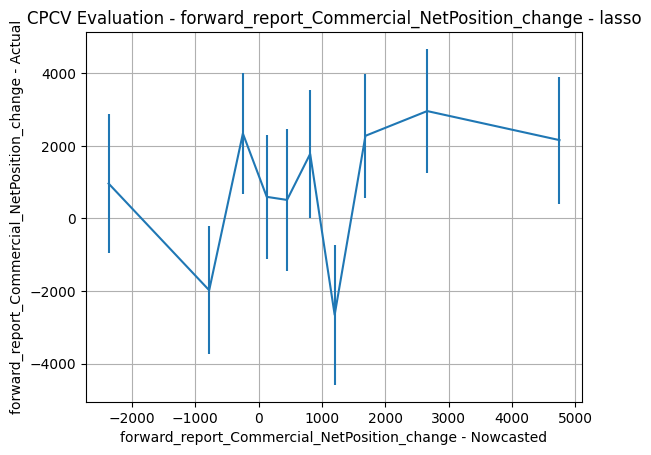

ridge: score=0.0545, params={'model': 'ridge', 'alpha': 509.2222138472398}
{'alpha': 509.2222138472398}


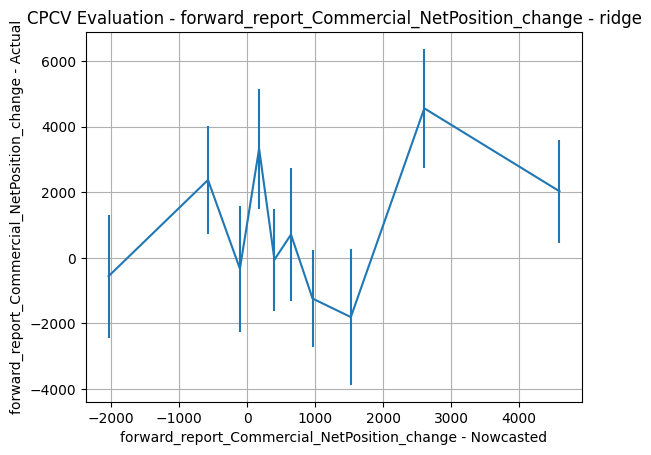

rf: score=0.0660, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


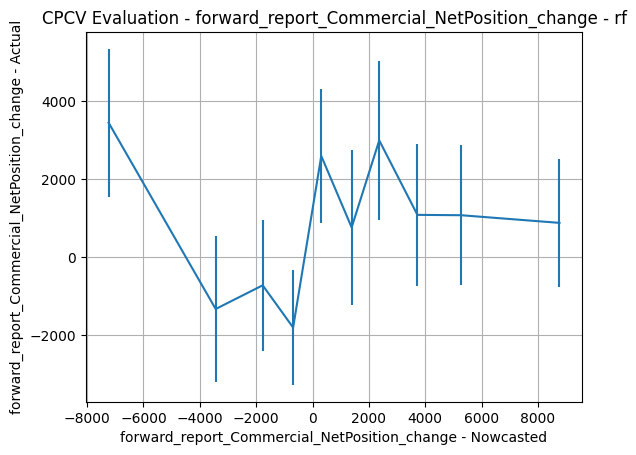

hgbm: score=0.0213, params={'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}
{'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}


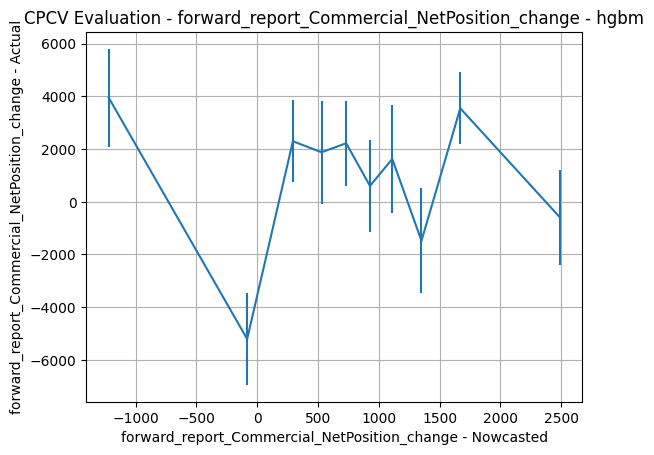

ols: score=0.0635, params={'model': 'ols'}
{}


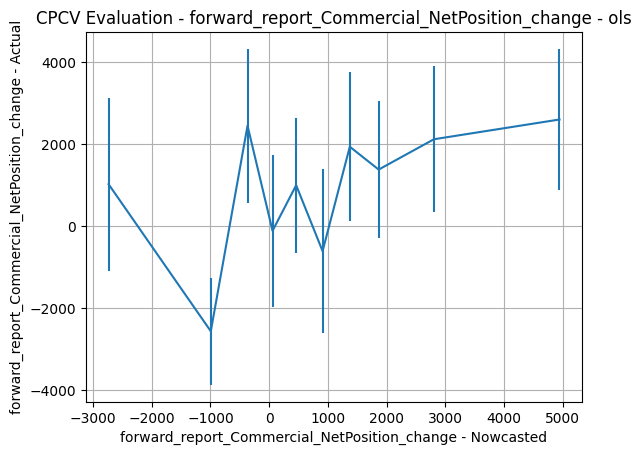

enet: score=-0.0964, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


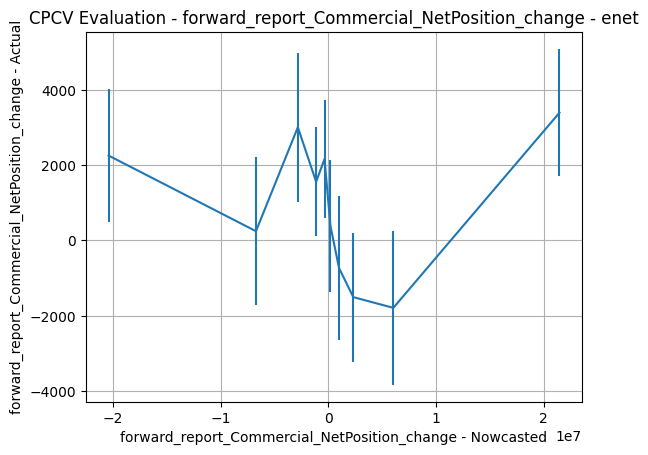

extra: score=0.0262, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'sqrt'}


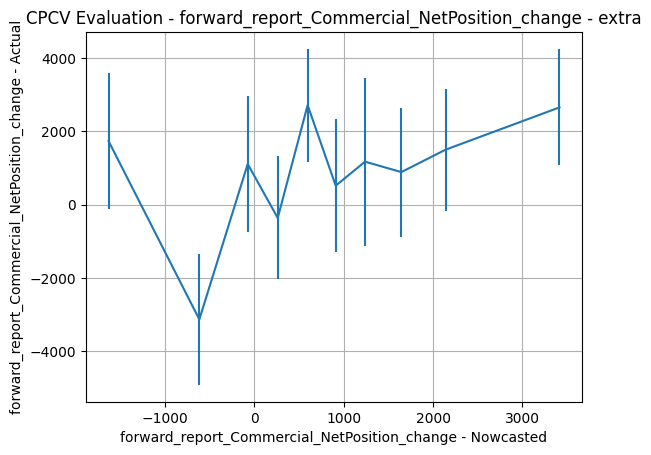

forward_report_CommercialLongPosition_change
lasso: score=0.3056, params={'model': 'lasso', 'alpha': 8.357633562224205e-06}
{'alpha': 8.357633562224205e-06}


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.877e+08, tolerance: 6.483e+07
  model = cd_fast.enet_coordinate_descent(


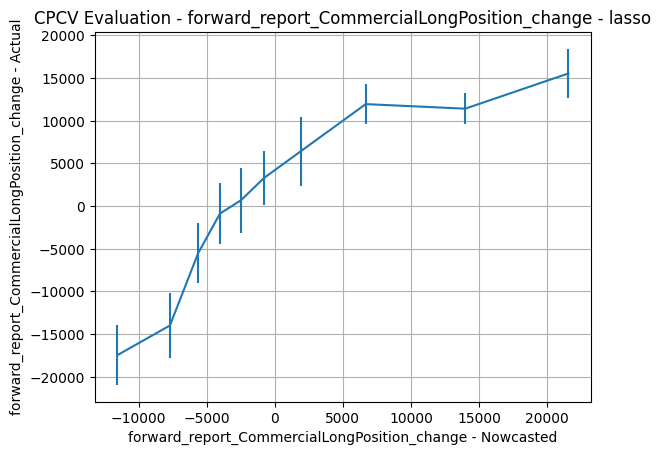

ridge: score=0.3046, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


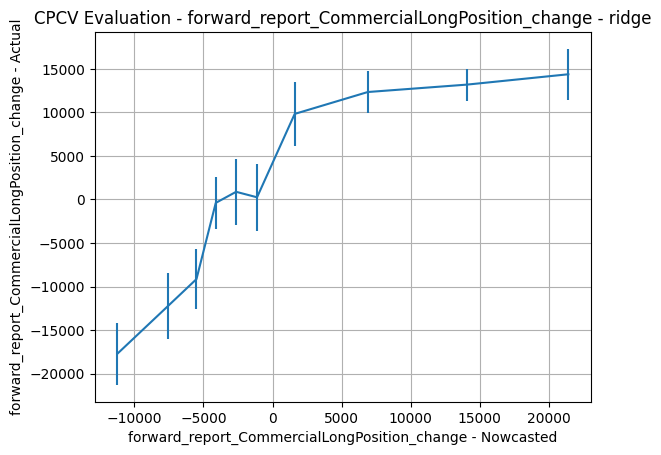

rf: score=0.4024, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
{'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}


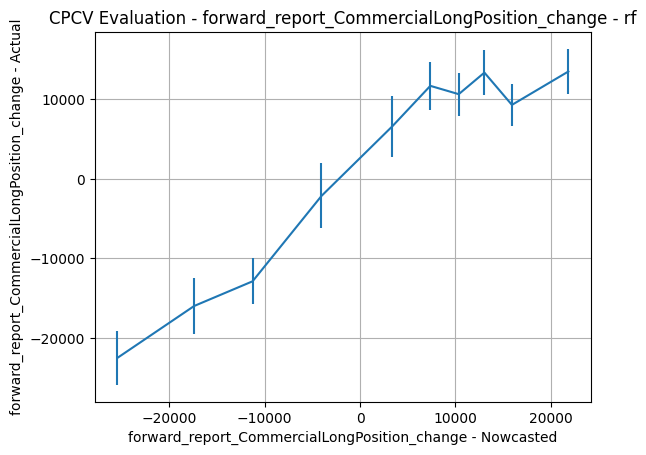

hgbm: score=0.3073, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


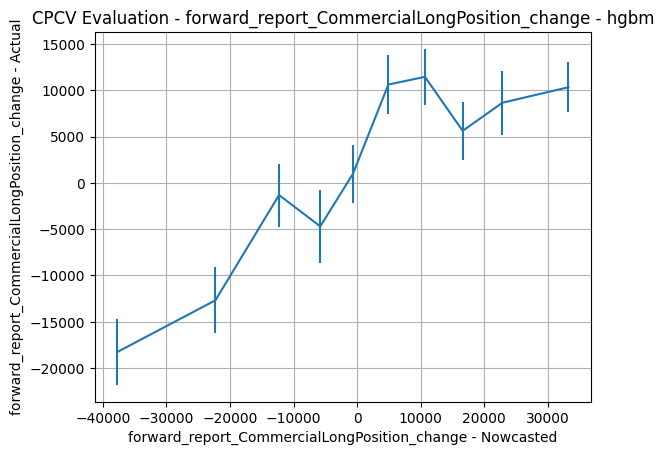

ols: score=0.3056, params={'model': 'ols'}
{}


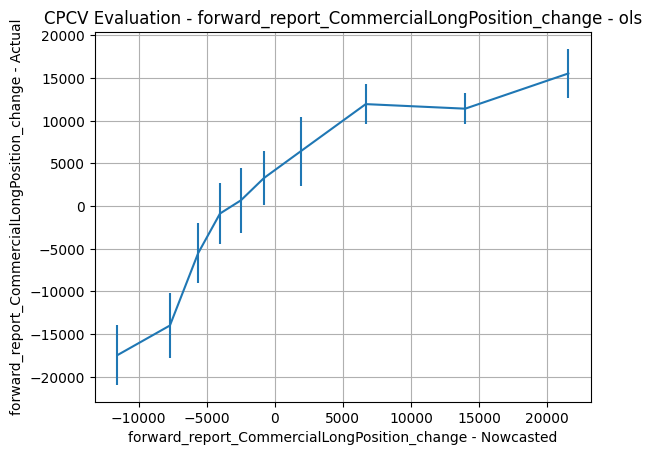

enet: score=0.3004, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


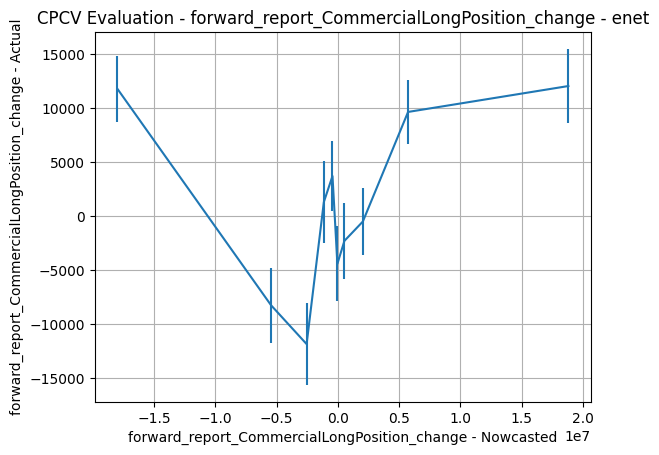

extra: score=0.3789, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt'}


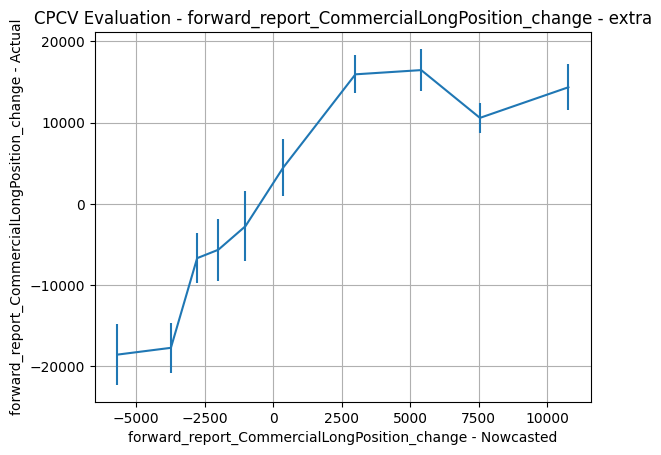

forward_report_CommercialShortPosition_change
lasso: score=0.2786, params={'model': 'lasso', 'alpha': 8.357633562224205e-06}
{'alpha': 8.357633562224205e-06}


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.796e+09, tolerance: 5.674e+07
  model = cd_fast.enet_coordinate_descent(


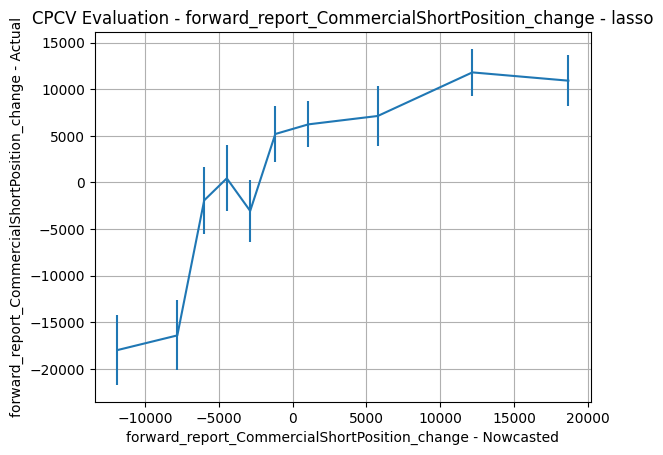

ridge: score=0.2761, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


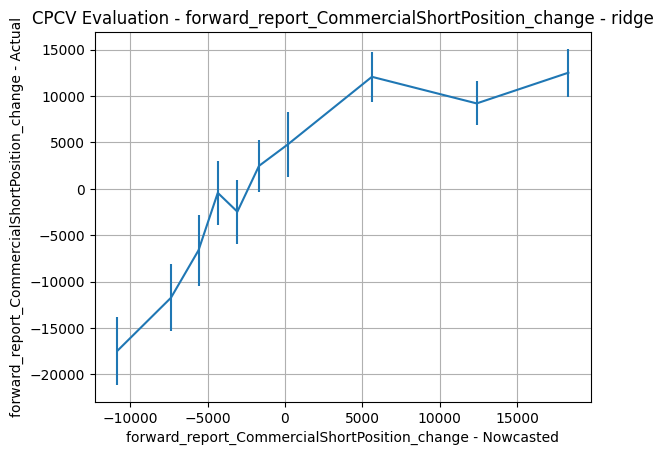

rf: score=0.4015, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


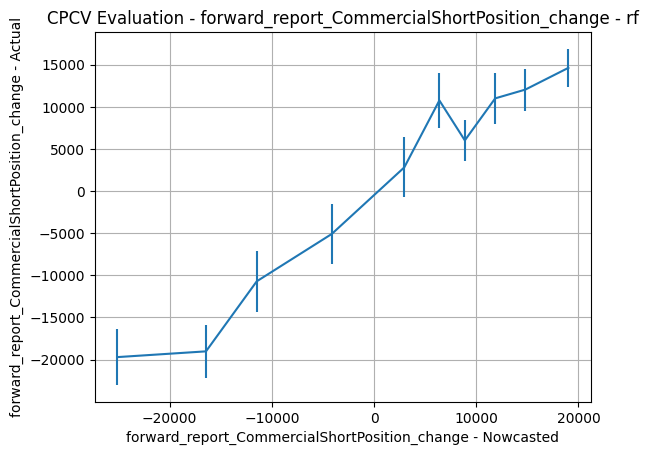

hgbm: score=0.2993, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 10, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 10, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


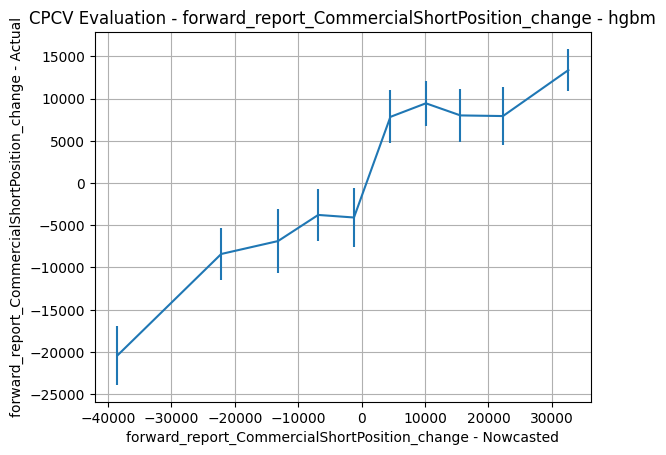

ols: score=0.2786, params={'model': 'ols'}
{}


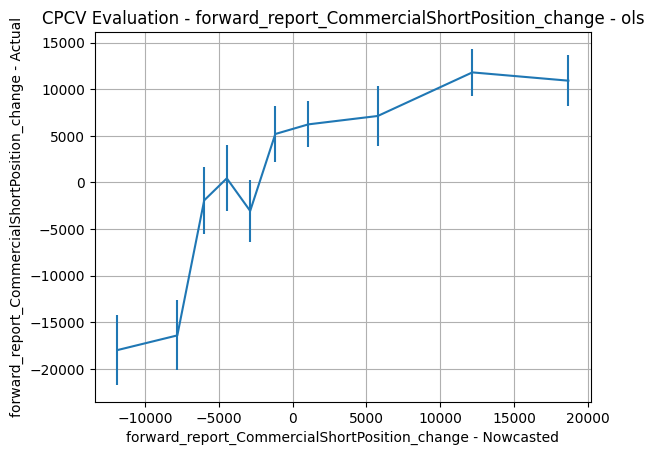

enet: score=0.2498, params={'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}
{'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}


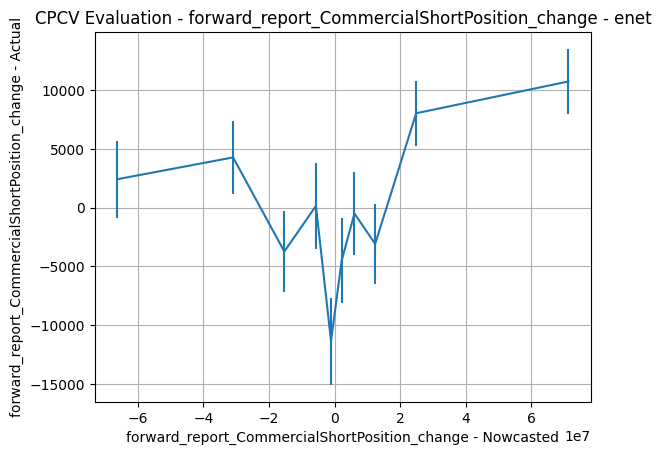

extra: score=0.3509, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


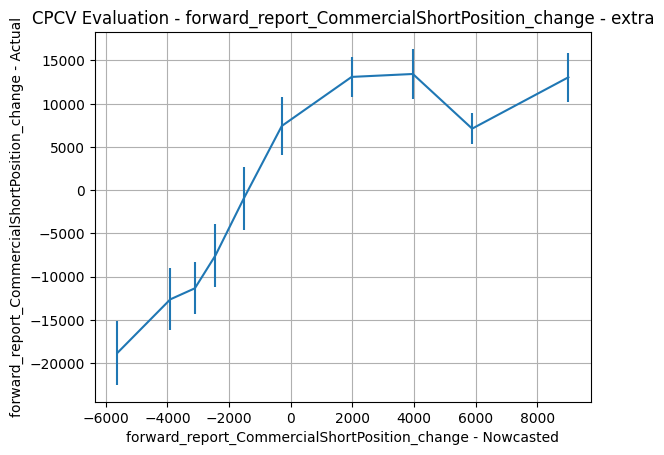

forward_Commercial_NetPosition_to_openinterest_change
lasso: score=-0.1223, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


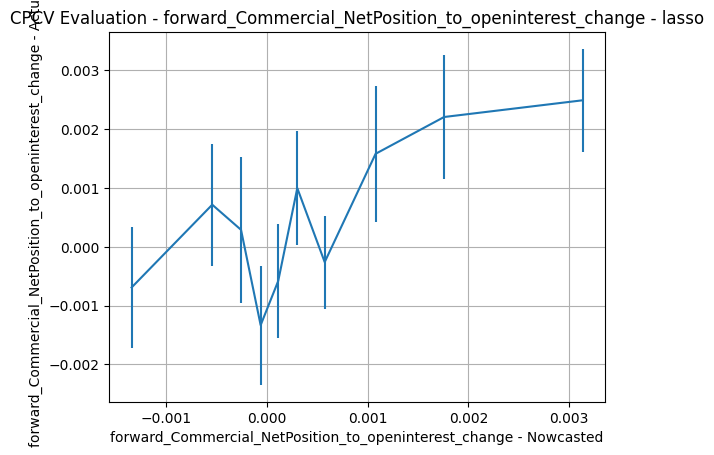

ridge: score=0.0677, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


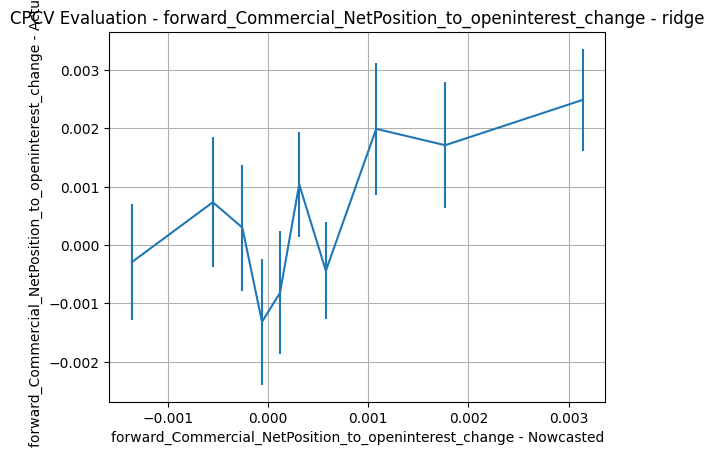

rf: score=0.1200, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'log2'}


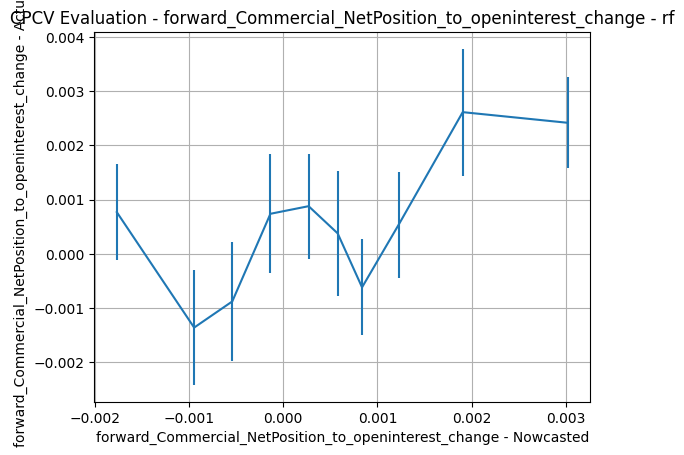

hgbm: score=0.1174, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


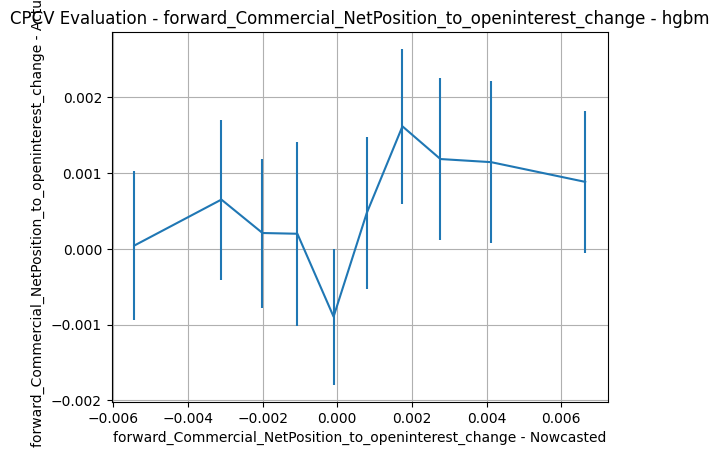

ols: score=0.0857, params={'model': 'ols'}
{}


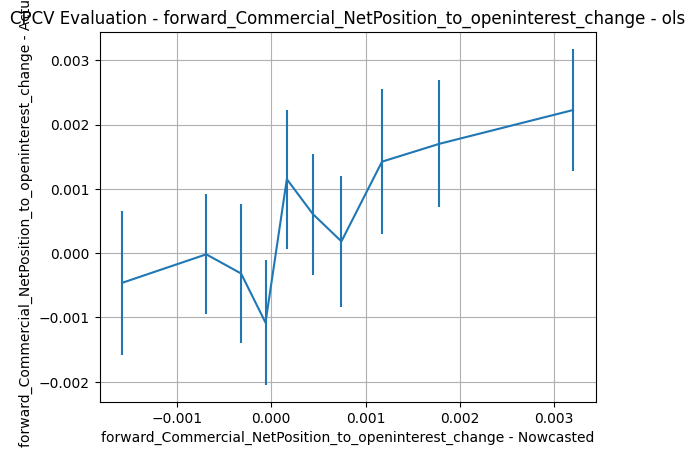

enet: score=-0.1181, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


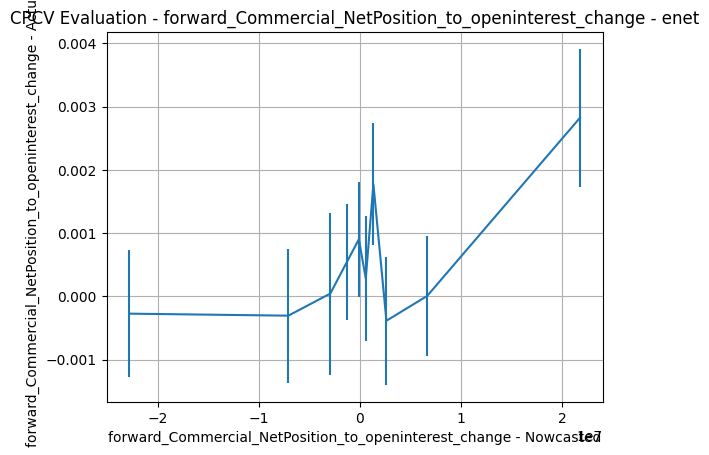

extra: score=0.0870, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 6, 'max_features': 'sqrt'}


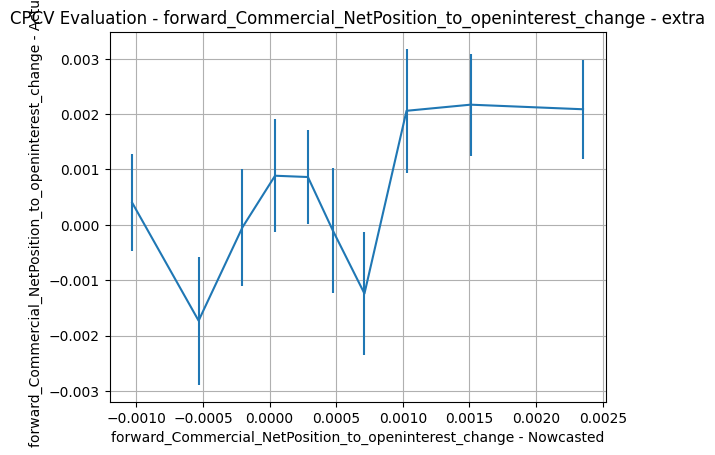

forward_CommercialLongPosition_to_openinterest_change
lasso: score=-0.0613, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


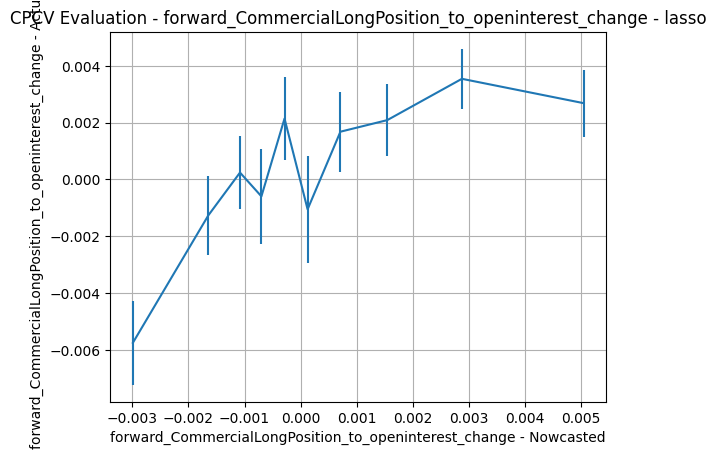

ridge: score=0.1496, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=3.1248e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=3.16359e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=3.17609e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=3.60031e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overw

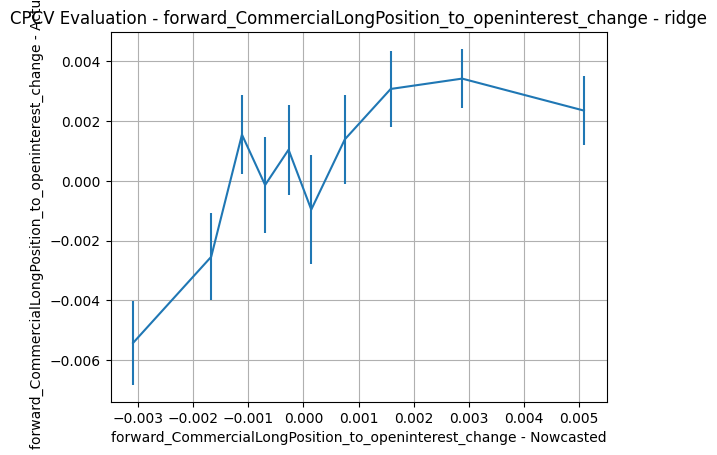

rf: score=0.2425, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 7, 'max_features': 'sqrt'}
{'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 7, 'max_features': 'sqrt'}


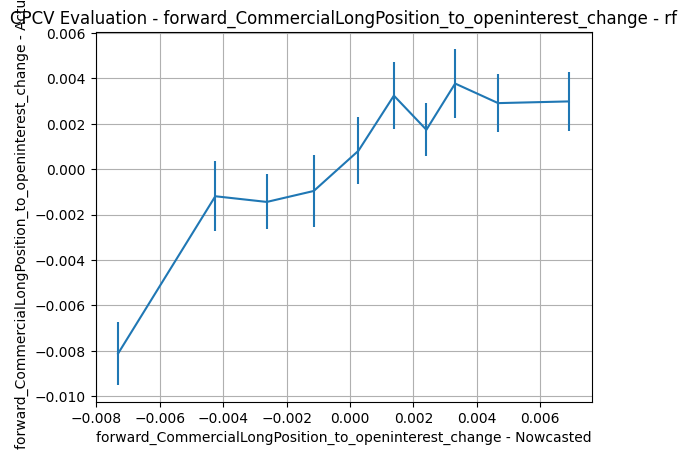

hgbm: score=0.1105, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


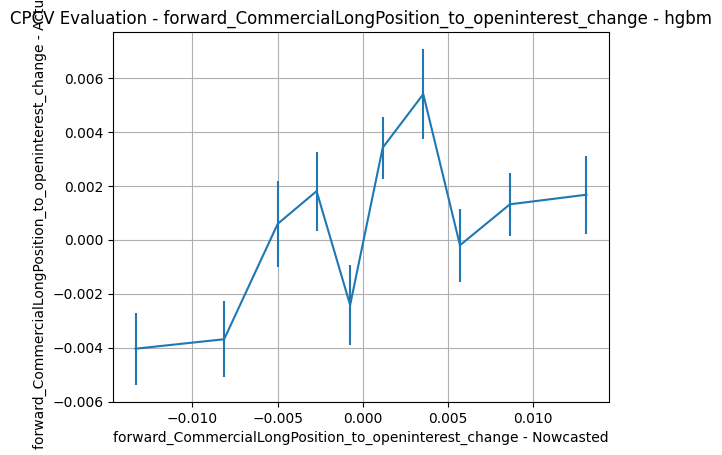

ols: score=0.1496, params={'model': 'ols'}
{}


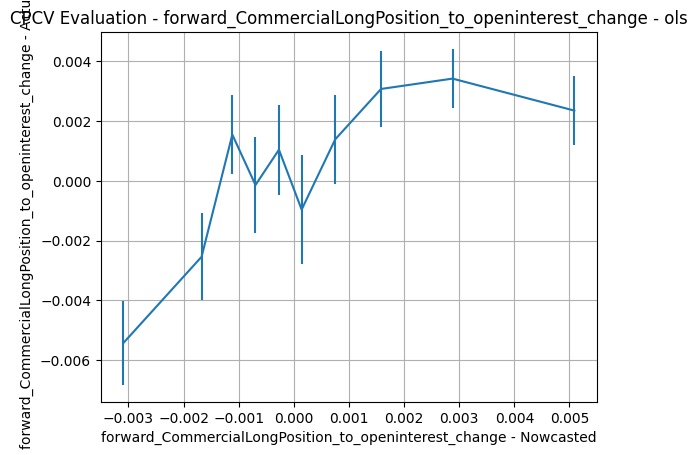

enet: score=-0.0631, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


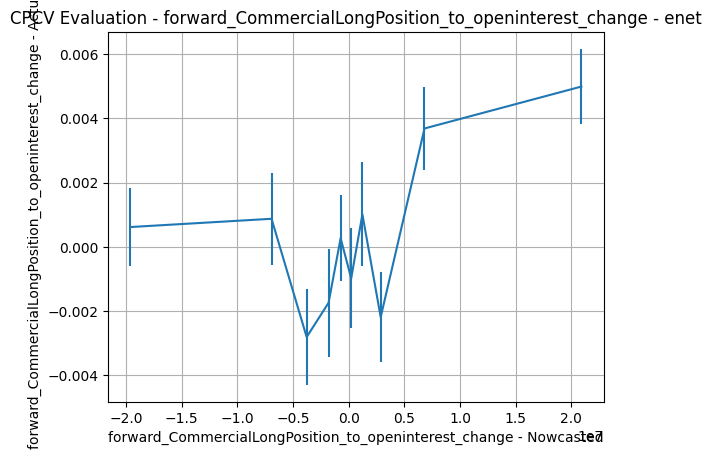

extra: score=0.1938, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


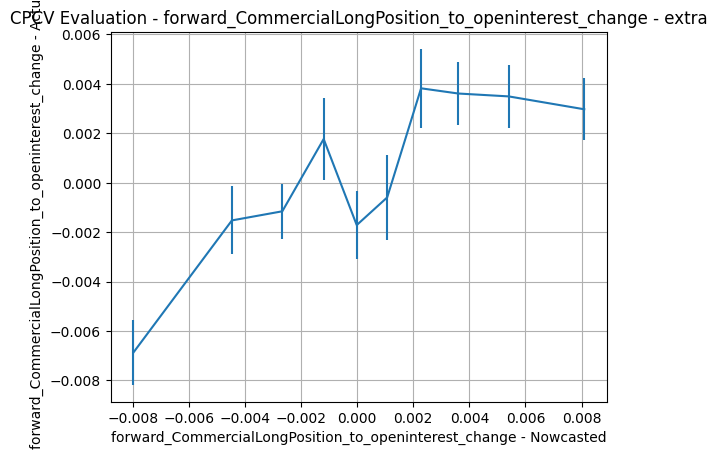

forward_CommercialShortPosition_to_openinterest_change
lasso: score=-0.0641, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


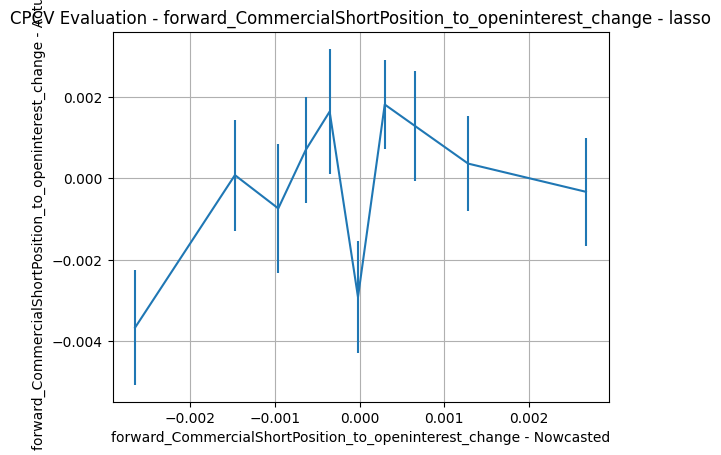

ridge: score=0.0722, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


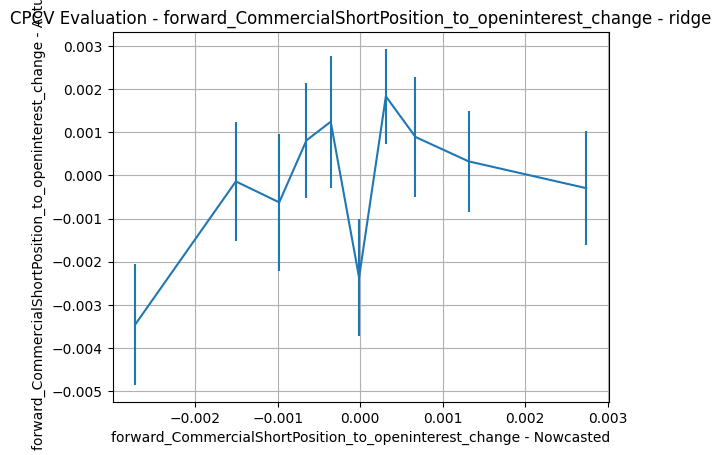

rf: score=0.2258, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}


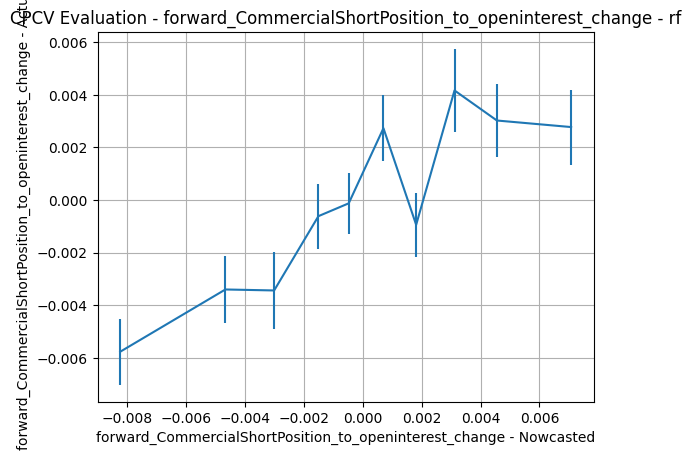

hgbm: score=0.1980, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


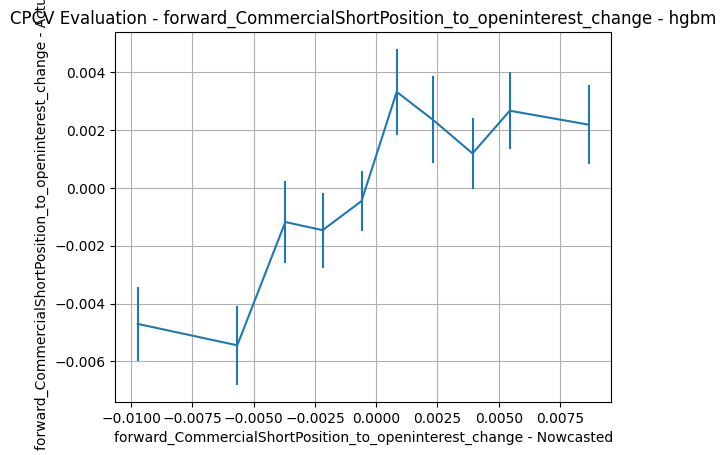

ols: score=0.0838, params={'model': 'ols'}
{}


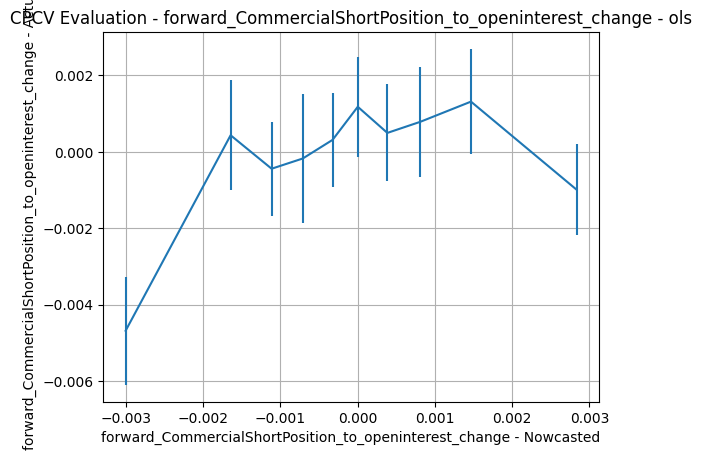

enet: score=-0.0538, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


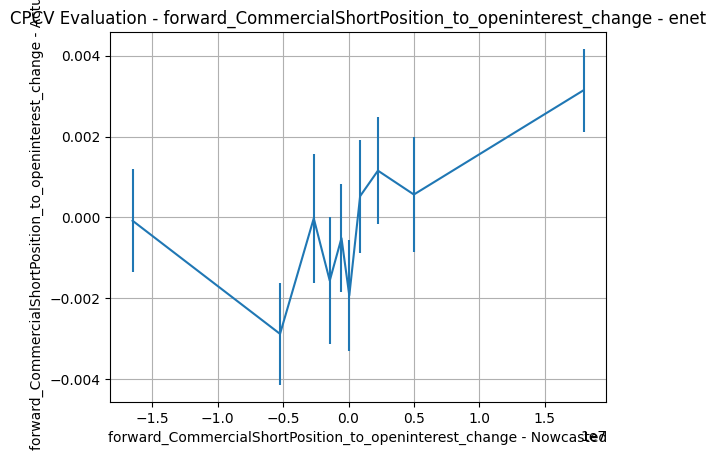

extra: score=0.2101, params={'model': 'extra', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
{'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}


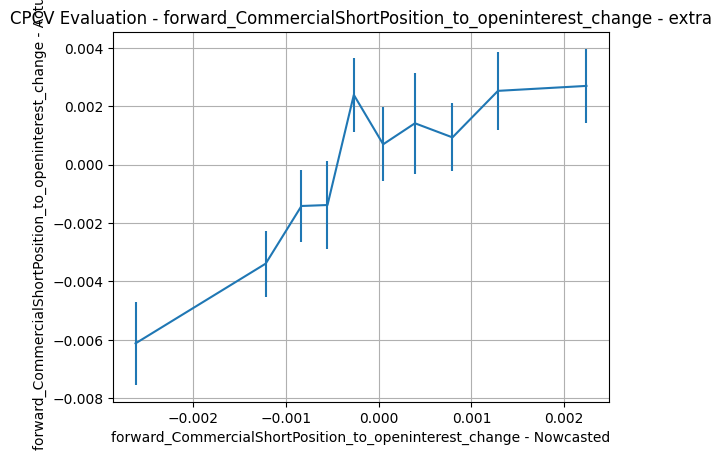

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
forward_report_Commercial_NetPosition_change,0.040535,0.034409,-0.026175,-0.025790,0.048286,-0.006912,0.029562
forward_report_CommercialLongPosition_change,0.305992,0.309321,0.393393,0.292166,0.305992,0.065320,0.366177
forward_report_CommercialShortPosition_change,0.287964,0.283393,0.409614,0.317325,0.287964,0.050628,0.339795
forward_Commercial_NetPosition_to_openinterest_change,0.086319,0.084871,0.072307,0.025217,0.090285,0.058071,0.079559
forward_CommercialLongPosition_to_openinterest_change,0.157927,0.152605,0.226251,0.135471,0.152601,0.092461,0.210552
forward_CommercialShortPosition_to_openinterest_change,0.082099,0.083035,0.228311,0.198033,0.083834,0.068619,0.207682


In [38]:
final_selected_model_per_response = dict(pd.DataFrame(response_performance_map).T.idxmax(axis=1))

In [39]:
final_selected_model_and_parameters_per_response = {}
for response_name , best_model_params in responses_best_per_model.items():
    print(response_name)
    best_model_name = final_selected_model_per_response[response_name]
    best_model_params = copy.deepcopy(best_model_params[best_model_name]['params'])
    del best_model_params['model']
    print(best_model_params)
    final_selected_model_and_parameters_per_response[response_name] = {
                    'model_name' : best_model_name, 
                    'params': best_model_params
        
    }
    

forward_report_Commercial_NetPosition_change
{}
forward_report_CommercialLongPosition_change
{'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
forward_report_CommercialShortPosition_change
{'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
forward_Commercial_NetPosition_to_openinterest_change
{}
forward_CommercialLongPosition_to_openinterest_change
{'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 7, 'max_features': 'sqrt'}
forward_CommercialShortPosition_to_openinterest_change
{'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}


In [40]:
final_selected_model_and_parameters_per_response

{'forward_report_Commercial_NetPosition_change': {'model_name': 'ols',
  'params': {}},
 'forward_report_CommercialLongPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 800,
   'max_depth': 18,
   'min_samples_leaf': 2,
   'max_features': 'sqrt'}},
 'forward_report_CommercialShortPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 600,
   'max_depth': 12,
   'min_samples_leaf': 3,
   'max_features': 'sqrt'}},
 'forward_Commercial_NetPosition_to_openinterest_change': {'model_name': 'ols',
  'params': {}},
 'forward_CommercialLongPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 600,
   'max_depth': 14,
   'min_samples_leaf': 7,
   'max_features': 'sqrt'}},
 'forward_CommercialShortPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 200,
   'max_depth': 22,
   'min_samples_leaf': 1,
   'max_features': 'log2'}}}

In [41]:
import json
with open("wti_cot_comm_forecast_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f)